# Amphi 7 - More About Natural Language Processing [1] - Around Word Embeddings

# 1. Word Embeddings. Word Analogy

## 1.1 Introduction

In last amphi, we learned how to represent words by a one-hot vector of $K$ dimensions, where $K$ is a vocabulary of size $V$. Each word is denoted by a vector $O_{j}, j = 1, \ldots, V$ (stands for one-hot vector). This representation, however, does not provide a good representation of similarity of words.

We would like to have a representation, called **featurized representation** of words as vectors that allow us to build a "similarity function" between 2 words. This will group words of same concept (animal, fruit, people, etc.) together.

We would like something like this

<table>
<tr>
    <th>Word</th>
    <th>Dimension 1 - People</th>
    <th>Dimension 2 - Gender</th>
    <th>Dimension 3 - Fruit</th>
    <th>Dimension 4 - Animal</th>
    <th>Dimension 5 - Age</th>
</tr>
<tr>
    <td>Man</td>
    <td>1</td>
    <td>0.97</td>
    <td>0.02</td>
    <td>0.32</td>
    <td>0.45</td>
</tr>
<tr>
    <td>Queen</td>
    <td>0.99</td>
    <td>-0.97</td>
    <td>-0.02</td>
    <td>0.24</td>
    <td>0.45</td>
</tr>
<tr>
    <td>Dog</td>
    <td>0.11</td>
    <td>0.07</td>
    <td>-0.01</td>
    <td>0.98</td>
    <td>0.06</td>
</tr>
<tr>
    <td>Child</td>
    <td>0.96</td>
    <td>0.22</td>
    <td>0.03</td>
    <td>0.31</td>
    <td>-0.87</td>
</tr>
<tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
</tr>  
<tr>
    <td>Apple</td>
    <td>0.01</td>
    <td>-0.02</td>
    <td>-0.03</td>
    <td>0</td>
    <td>0.96</td>
</tr>
</table>

The idea of word embeddings is to embed words (as vectors in high dimensionality) to some subspace of lower-dimension.

**Application: **

We can use these similarity to deduce concept in other sentences. For example, in name recognition.

Training example: ***Henri IV is a king.***

We know that ***Henri IV*** is a name entity.

Test example: ***Elizabeth II is a queen.***

We know that ***queen*** is very similar to ***king*** (in fact they refer to the ***people*** group), then we can deduce that ***Elizabeth II*** is a name entity. 

**In reality**, the meaning of the dimensions of those vectors are more complicated to figure out than something like "gender", "age", "fruit", etc. But it can give similarity between words and pairs of words.

The strategy of reduce the dimensionality of the word space to some lower-dimensional space that allows better representation for word similarity is called **word embeddings**.

**Strategy to use word embeddings in NLP problems** 

1. Learn word embeddings from large text corpus (or get some pre-trained word embeddings)

2. Transfer embedding to new NLP problem with smaller training set (like name entity recognition)

3. Continue to improve word embeddings with new data



## 1.2 Analogy (Word Similarity)

We would like to define analogy between pairs of words like `(man, woman)` $\sim$ `(king, queen)`.

In the previous table, we can see something like this:
$$
e_{man} - e_{woman} \approx (0, 2, \ldots, 0)
$$
and
$$
e_{king} - e_{queen} \approx (0, 2, \ldots, 0)
$$

This gives us an idea about the notion of similarity: $(w_1, w_2)$ are said to be similar to $(v_1, v_2)$ if $w_1 - w_2 \approx v_1 - v_2$.

We can define a function to evaluate the similarity between pairs of words:

**Eucliean similarity**

For 2 embeddings $w_1, w_2$, the Euclidean similarity of them is defined by

$$
d(w_1, w_2) = \Vert w_1 - w_2 \Vert^2
$$

Then $(w_1, w_2)$ and $(v_1, v_2)$ are said to be similar if $d(w_1 - w_2 + v_2, w_1) $ is a small positive number ($\approx 0$)

**Cosine similarity**

For 2 embeddings $w_1, w_2$, the cosine similarity of them is defined by
$$
\mathrm{sim}(w_1, w_2) = \frac{w_1 \cdot w_2}{|w_1|\cdot |w_2|}
$$

Then $(w_1, w_2)$ is said similar to $(v_1, v_2)$ if
$$
\mathrm{sim}(w_1 - w_2 + v_2, v_1) 
$$
is near 1. ($\approx 1$)

If it is near -1, then $(w_1, w_2)$ is similar to $(-v_1, v_2)$.

**Application**

Suppose we have the sentences:

- `Beijing is the capital of China.`

and

- `Hanoi is the capital of ... .`

We can try to predict the missing word by solving:
$$
\max \limits_{v \in \textrm{The vocabulary}} \mathrm{sim}(w_1 - w_2 + v_2, v)
$$

(for cosine similarity)

or
$$
\max \limits_{v \in \textrm{The vocabulary}} d(w_1 - w_2 + v_2, v)
$$

(for Euclidean distance similarity)

where $w_1 = $`China`, $w_2 = $`Beijing`, $v_2 =$`Hanoi`.

## 1.3 Language Modelling with Word Embeddings

We return to the language modeling problem. Given a text, predict the next word. This time, we do not use one-hot-coding, but word embeddings.

<img src="F1.png" width=700>
<center>
    In the figure, $x^{<i>}$ are now word embeddings
</center>

**Embedding matrix**

Suppose we embed $V$ words into a space of $D$ dimensions. The $D\times V$-matrix whose columns are embedded vectors of $O_1, \ldots O_d$ are called the **embedding matrix** associated to our word embeddings. We will denote this matrix by $E$.


# 2. Pretrained Models (Introduction)

## 2.3 Pretrained Word2Vec model

The Word2vec model learns word embeddings from text classification problems. We can download the pretrained model (in English) online, for example at https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

There are 3 million words and phrases. Words are represented by 300-dimensional vectors. Complex words like *"New York"* are represented with underscore "\_" like *"New\_York"*. 

**Load pretrained model**

In [1]:
# Code from udemy NLP course by LazyProgrammer
# Should take 1 min or more

from __future__ import print_function, division
from future.utils import iteritems
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

FILE_LOCATION_W2V = './GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin'

In [2]:
from gensim.models import KeyedVectors

word_vectors_w2v = KeyedVectors.load_word2vec_format(
  FILE_LOCATION_W2V,
  binary=True
)

** Vector representation of a word**

In [3]:
print(word_vectors_w2v.get_vector('king'))
print(word_vectors_w2v.get_vector('king').shape)

[ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58203125e-01
 -2.59765625e-01  2.01416016e-02 -1.63085938e-01  1.35803223e-03
 -1.44531250e-01 -5.68847656e-02  4.29687500e-02 -2.46582031e-02
  1.85546875e-01  4.47265

** Find analogy **

In [4]:
def find_analogies_w2v(w1, w2, w3):
  r = word_vectors_w2v.most_similar(positive=[w1, w3], negative=[w2])
  print("%s - %s = %s - %s" % (w1, w2, r[0][0], w3))

def nearest_neighbors_w2v(w):
  r = word_vectors_w2v.most_similar(positive=[w])
  print("neighbors of: %s" % w)
  for word, score in r:
    print("\t%s" % word)

** Evaluate the word embeddings by word analogy **

In [5]:
find_analogies_w2v('king', 'man', 'woman')
find_analogies_w2v('france', 'paris', 'london')
find_analogies_w2v('france', 'paris', 'rome')
find_analogies_w2v('paris', 'france', 'italy')
find_analogies_w2v('france', 'french', 'english')
find_analogies_w2v('japan', 'japanese', 'chinese')
find_analogies_w2v('japan', 'japanese', 'italian')
find_analogies_w2v('japan', 'japanese', 'australian')
find_analogies_w2v('december', 'november', 'june')
find_analogies_w2v('miami', 'florida', 'texas')
find_analogies_w2v('einstein', 'scientist', 'painter')
find_analogies_w2v('china', 'rice', 'bread')
find_analogies_w2v('man', 'woman', 'she')
find_analogies_w2v('man', 'woman', 'aunt')
find_analogies_w2v('man', 'woman', 'sister')
find_analogies_w2v('man', 'woman', 'wife')
find_analogies_w2v('man', 'woman', 'actress')
find_analogies_w2v('man', 'woman', 'mother')
find_analogies_w2v('heir', 'heiress', 'princess')
find_analogies_w2v('nephew', 'niece', 'aunt')
find_analogies_w2v('france', 'paris', 'tokyo')
find_analogies_w2v('france', 'paris', 'beijing')
find_analogies_w2v('february', 'january', 'november')
find_analogies_w2v('france', 'paris', 'rome')
find_analogies_w2v('paris', 'france', 'italy')

king - man = queen - woman
france - paris = england - london
france - paris = italy - rome
paris - france = lohan - italy
france - french = england - english
japan - japanese = tibet - chinese
japan - japanese = italy - italian
japan - japanese = queensland - australian
december - november = september - june
miami - florida = dallas - texas
einstein - scientist = jude - painter
china - rice = dinnerware - bread
man - woman = he - she
man - woman = uncle - aunt
man - woman = brother - sister
man - woman = son - wife
man - woman = actor - actress
man - woman = father - mother
heir - heiress = prince - princess
nephew - niece = uncle - aunt
france - paris = japan - tokyo
france - paris = chinese - beijing
february - january = april - november
france - paris = italy - rome
paris - france = lohan - italy


**Evaluate the word embeddings by nearest neighbors**

In [6]:
nearest_neighbors_w2v('king')
nearest_neighbors_w2v('france')
nearest_neighbors_w2v('japan')
nearest_neighbors_w2v('einstein')
nearest_neighbors_w2v('woman')
nearest_neighbors_w2v('nephew')
nearest_neighbors_w2v('february')
nearest_neighbors_w2v('rome')

neighbors of: king
	kings
	queen
	monarch
	crown_prince
	prince
	sultan
	ruler
	princes
	Prince_Paras
	throne
neighbors of: france
	spain
	french
	germany
	europe
	italy
	england
	european
	belgium
	usa
	serbia
neighbors of: japan
	japanese
	tokyo
	america
	europe
	germany
	chinese
	india
	hawaii
	usa
	korea
neighbors of: einstein
	nikki
	lmfao
	albert
	armstrong
	joan
	becky
	mcmahon
	conrad
	lori
	haley
neighbors of: woman
	man
	girl
	teenage_girl
	teenager
	lady
	teenaged_girl
	mother
	policewoman
	boy
	Woman
neighbors of: nephew
	son
	uncle
	brother
	grandson
	cousin
	father
	niece
	younger_brother
	nephews
	stepson
neighbors of: february
	january
	april
	september
	december
	july
	october
	november
	june
	feb
	norway
neighbors of: rome
	athens
	albert
	holmes
	donnie
	italy
	toni
	spain
	jh
	pablo
	malta


In [7]:
find_analogies_w2v('paris', 'france', 'vietnam')
find_analogies_w2v('paris', 'france', 'thailand')

paris - france = samuel - vietnam
paris - france = bangkok - thailand


**Evaluate word embeddings by classification**

## 2.4 Pretrained GloVe model

The GloVe model learns word embeddings from word similarity. We can download the pretrained model (in English) online, for example at http://nlp.stanford.edu/data/glove.6B.zip

There are 50000-300000 words. Words are represented by 300-dimensional vectors.

In [8]:
FILE_LOCATION_GLOVE = './glove.6B/glove.6B.50d.txt'

**Define some metrics**

In [9]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances


def dist1(a, b):
    return np.linalg.norm(a - b)
def dist2(a, b):
    return 1 - a.dot(b) / (np.linalg.norm(a) * np.linalg.norm(b))

# pick a distance type
dist, metric = dist2, 'cosine'

** Load model **

In [10]:
print('Loading word vectors...')
word_vectors_glove = {}
embedding = []
idx2word = []
with open(FILE_LOCATION_GLOVE, encoding='utf-8') as f:
  # is just a space-separated text file in the format:
  # word vec[0] vec[1] vec[2] ...
    for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:], dtype='float32')
        word_vectors_glove[word] = vec
        embedding.append(vec)
        idx2word.append(word)
print('Found %s word vectors.' % len(word_vectors_glove))
embedding = np.array(embedding)
V, D = embedding.shape

Loading word vectors...
Found 400000 word vectors.


** Word analogy **

In [11]:
def find_analogies_glove(w1, w2, w3, word_vectors_glove = word_vectors_glove):
    for w in (w1, w2, w3):
        if w not in word_vectors_glove:
            print("%s not in dictionary" % w)
            return

    king = word_vectors_glove[w1]
    man = word_vectors_glove[w2]
    woman = word_vectors_glove[w3]
    v0 = king - man + woman

    distances = pairwise_distances(v0.reshape(1, D), embedding, metric=metric).reshape(V)
    idxs = distances.argsort()[:4]
    for idx in idxs:
        word = idx2word[idx]
        if word not in (w1, w2, w3): 
            best_word = word
            break

    print(w1, "-", w2, "=", best_word, "-", w3)

def nearest_neighbors_glove(w, n=5, word_vectors_glove = word_vectors_glove):
    if w not in word_vectors_glove:
        print("%s not in dictionary:" % w)
        return

    v = word_vectors_glove[w]
    distances = pairwise_distances(v.reshape(1, D), embedding, metric=metric).reshape(V)
    idxs = distances.argsort()[1:n+1]
    print("neighbors of: %s" % w)
    for idx in idxs:
        print("\t%s" % idx2word[idx])

** Evaluate the model with word analogy **

In [12]:
find_analogies_glove('king', 'man', 'woman')
find_analogies_glove('france', 'paris', 'london')
find_analogies_glove('france', 'paris', 'rome')
find_analogies_glove('paris', 'france', 'italy')
find_analogies_glove('france', 'french', 'english')
find_analogies_glove('japan', 'japanese', 'chinese')
find_analogies_glove('japan', 'japanese', 'italian')
find_analogies_glove('japan', 'japanese', 'australian')
find_analogies_glove('december', 'november', 'june')
find_analogies_glove('miami', 'florida', 'texas')
find_analogies_glove('einstein', 'scientist', 'painter')
find_analogies_glove('china', 'rice', 'bread')
find_analogies_glove('man', 'woman', 'she')
find_analogies_glove('man', 'woman', 'aunt')
find_analogies_glove('man', 'woman', 'sister')
find_analogies_glove('man', 'woman', 'wife')
find_analogies_glove('man', 'woman', 'actress')
find_analogies_glove('man', 'woman', 'mother')
find_analogies_glove('heir', 'heiress', 'princess')
find_analogies_glove('nephew', 'niece', 'aunt')
find_analogies_glove('france', 'paris', 'tokyo')
find_analogies_glove('france', 'paris', 'beijing')
find_analogies_glove('february', 'january', 'november')
find_analogies_glove('france', 'paris', 'rome')
find_analogies_glove('paris', 'france', 'italy')

king - man = queen - woman
france - paris = britain - london
france - paris = italy - rome
paris - france = rome - italy
france - french = england - english
japan - japanese = china - chinese
japan - japanese = italy - italian
japan - japanese = australia - australian
december - november = july - june
miami - florida = houston - texas
einstein - scientist = matisse - painter
china - rice = chinese - bread
man - woman = he - she
man - woman = uncle - aunt
man - woman = brother - sister
man - woman = friend - wife
man - woman = actor - actress
man - woman = father - mother
heir - heiress = queen - princess
nephew - niece = uncle - aunt
france - paris = japan - tokyo
france - paris = china - beijing
february - january = october - november
france - paris = italy - rome
paris - france = rome - italy


In [13]:
nearest_neighbors_glove('king')
nearest_neighbors_glove('france')
nearest_neighbors_glove('japan')
nearest_neighbors_glove('einstein')
nearest_neighbors_glove('woman')
nearest_neighbors_glove('nephew')
nearest_neighbors_glove('february')
nearest_neighbors_glove('rome')

neighbors of: king
	prince
	queen
	ii
	emperor
	son
neighbors of: france
	french
	belgium
	paris
	spain
	netherlands
neighbors of: japan
	japanese
	china
	korea
	tokyo
	taiwan
neighbors of: einstein
	relativity
	bohr
	physics
	heisenberg
	freud
neighbors of: woman
	girl
	man
	mother
	her
	boy
neighbors of: nephew
	cousin
	brother
	grandson
	son
	uncle
neighbors of: february
	october
	december
	january
	august
	september
neighbors of: rome
	naples
	venice
	italy
	turin
	pope


**Evaluate word embeddings by classification**

# 3. Language Modeling (cont'd) - Bigram and N-grams

Recall that the language model is a model of the probability of a sequence of words.

## 3.1 Bigrams, Trigrams, N-grams Models

### 3.1.1 Definitions

A **bigram**, **trigram**, **$N$-gram** is a sequence of 2, 3, $N$ consecutive words, respectively.

We will denote the current word by $w^{<t>}$ and the next word by $w^{<t+1>}$


A **bigram model** is a model that predict the probability of the next word using the current word only.

For example, the model predicts something like
$$
\mathbf P(w^{<t+1>} = "juice" | w^{<t>} = "orange") = 0.07
$$
(or shortly $\mathbf P("juice"|"orange") = 0.07$)

Similarly,
$$
\mathbf P("the"| "the") = 0
$$

Similarly, an **$N-$gram model** is a model that predicts the probability of the next word using $N-1$ previous words. 

How to construct those probabilities? One strategy is counting

### 3.1.2 Counting

One of the strategy to construct these probabilities is **counting**. Suppose we have a corpus of huge number of documents. This strategy suggests calculating the probability

$$
\mathbf P(w^{<t+1>} =B |w^{<t>}=A) = \frac{count(A\to B)}{count(A)}
$$

In probability language, we modelize the joint probability $\mathbf P(A \to B)$ as the frequency of "AB" as a consecutive sequence, then $P(A)$ as the frequency of "A" in the corpus. The conditional probabilities gives us the bigram model.

This is also called "maximum-likelihood" counting because we base on the training corpus to get what is the most likely-to-happen probability for the next word.

**Generalization**

We can generalize counting strategy to $N-$gram model.
$$
\mathbf P(A_N | A_1 \to A_2 \to \ldots A_{N-1}) = \frac{count(A_1\to A_2\to \ldots\to A_{N-1})}{count(A_1 \to A_2 \to \ldots A_{N-1})}
$$

### 3.1.3 Add-one smoothing

Instead of maximum-likelihood counting, we can add a small number to each count. Let $V$ be the vocabulary size (number of distinct words), then 

$$
\mathbf P_{smooth} (B | A) = \frac{count(A\to B) + 1}{count(A) + V}
$$

is also a valid probabilistic model (sum of probabilities on all different $B$ = 1). This model will avoid overfitting on the training set. For example, in our corpus if the sequence "orange leaf" does not exist, will still give it a small probability to be able to happen in generalization.

### 3.1.4 Markow Assumption for N-gram Model

The Markov assumption for N-gram model is: "What we see now depends only on what we see on the previous $N-1$ steps." That can also be translated by

$$
\begin{align}
& \mathbf P(w^{<t>}=A_N | w^{<1>}=B_1 \to \ldots \to w^{<t-N-1>}=B_{t-N-1}, w^{<t-N>} = A_1\to \ldots \to w^{t-1}=A_{N-1}) \\
                 &= \mathbf P(w^{<N>}=A_N | w^{<1>}=A_1\to \ldots \to w^{N-1}=A_{N-1}) \\
                 &= \mathbf P(w^{<t>}=A_N | w^{<t-N>}=A_1\to \ldots \to w^{t-1}=A_{N-1}) \\
                 &= \mathbf P(w^{<N>}=A_N | w^{<1>}=A_1\to \ldots \to w^{N-1}=A_{N-1}) 
\end{align}
$$

for any $t, A_1, \ldots, A_N, B_1, \ldots, B_{t-N-1}$.

**Corollary for a model with only bigrams**

If we construct a model with only bigrams, we can refind the probabilistic model for joint probability
$$
\mathbf P(A_1, \ldots, A_N) = \mathbf P(A_1) \mathbf P(A_2|A_1) \mathbf P(A_3|A_2) \ldots \mathbf P(A_N | A_{N-1})
$$

### 3.1.5 Implementation of a bigram model

In implementation, we should take $\log$ of probabilities to avoid them to reach 0.

We will use the Brown corpus at https://www.nltk.org/book/ch02.html. In file `brown.py`, we also wrote some functions to get data.

In [16]:
from brown import get_sentences_with_word2idx, get_sentences_with_word2idx_limit_vocab

In [19]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\ndoannguyen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


True

In [20]:
def get_bigram_probs(sentences, V, start_idx, end_idx, smoothing=1):
  # start_idx, end_idx are special "words". A sentence always begin with start_idx and end with end_idx
  bigram_probs = np.ones((V, V)) * smoothing
  for sentence in sentences:
    for i in range(len(sentence)):
      
      if i == 0:
        # beginning word
        bigram_probs[start_idx, sentence[i]] += 1
      else:
        # middle word
        bigram_probs[sentence[i-1], sentence[i]] += 1

      # if we're at the final word
      # we update the bigram for last -> current
      # AND current -> END token
      if i == len(sentence) - 1:
        # final word
        bigram_probs[sentence[i], end_idx] += 1

  # normalize the counts along the rows to get probabilities
  bigram_probs /= bigram_probs.sum(axis=1, keepdims=True)
  return bigram_probs

In [21]:
sentences, word2idx = get_sentences_with_word2idx_limit_vocab(10000)

# vocab size
V = len(word2idx)
print("Vocab size:", V)

# we will also treat beginning of sentence and end of sentence as bigrams
# START -> first word
# last word -> END
start_idx = word2idx['START']
end_idx = word2idx['END']

# a matrix where:
# row = last word
# col = current word
# value at [row, col] = p(current word | last word)
bigram_probs = get_bigram_probs(sentences, V, start_idx, end_idx, smoothing=0.1)

START inf
END inf
man inf
paris inf
britain inf
england inf
king inf
woman inf
rome inf
london inf
queen inf
italy inf
france inf
the 69971
, 58334
. 49346
of 36412
and 28853
to 26158
a 23195
in 21337
that 10594
is 10109
was 9815
he 9548
for 9489
`` 8837
'' 8789
it 8760
with 7289
as 7253
his 6996
on 6741
be 6377
; 5566
at 5372
by 5306
i 5164
this 5145
had 5133
? 4693
not 4610
are 4394
but 4381
from 4370
or 4206
have 3942
an 3740
they 3620
which 3561
-- 3432
one 3292
you 3286
were 3284
her 3036
all 3001
she 2860
there 2728
would 2714
their 2669
we 2652
him 2619
been 2472
) 2466
has 2437
( 2435
when 2331
who 2252
will 2245
more 2215
if 2198
no 2139
out 2097
so 1985
said 1961
what 1908
up 1890
its 1858
about 1815
: 1795
into 1791
than 1790
them 1788
can 1772
only 1748
other 1702
new 1635
some 1618
could 1601
time 1598
! 1596
these 1573
two 1412
may 1402
then 1380
do 1363
first 1361
any 1344
my 1318
now 1314
such 1303
like 1292
our 1252
over 1236
me 1181
even 1170
most 1159
made 1125
also 

firm 109
income 109
ahead 109
deep 109
there's 109
language 109
principle 109
none 108
price 108
designed 108
indicated 108
analysis 108
distance 108
expect 108
established 108
products 108
effects 108
growing 108
importance 108
continue 107
serve 107
determine 107
cities 107
elements 107
negro 107
leaders 107
division 107
pretty 107
easily 107
existence 107
attitude 107
stress 107
8 106
afternoon 106
limited 106
hardly 106
agreement 106
factors 106
scene 106
remained 106
closed 106
write 106
applied 106
health 105
married 105
suggested 105
attack 105
rhode 105
interested 105
station 105
professional 105
won't 105
drive 105
season 105
reach 105
b 105
despite 104
current 104
spent 104
eight 104
covered 104
role 104
played 104
i'd 104
becomes 104
date 103
council 103
race 103
unit 103
commission 103
original 103
mouth 103
reasons 103
studies 103
exactly 103
machine 103
built 103
teeth 103
relations 102
rise 102
demand 102
prepared 102
1959 102
related 102
rates 102
news 102
supply 102
ja

nearby 45
interference 45
mounted 45
cup 45
intended 45
brain 45
qualities 45
offers 45
february 45
riding 45
lucy 45
contain 45
expenditures 45
meat 45
watson 45
elsewhere 45
prime 45
ballet 45
cast 45
approached 45
angry 45
universal 45
terrible 45
medium 45
diameter 45
discovery 45
ice 45
curve 45
mold 45
burden 44
listed 44
warning 44
considerably 44
mostly 44
amounts 44
admitted 44
errors 44
wisdom 44
opinions 44
asia 44
continuous 44
seeking 44
origin 44
acres 44
changing 44
confusion 44
hundreds 44
developments 44
enjoy 44
fired 44
younger 44
helping 44
pounds 44
accomplished 44
lies 44
suffering 44
lovely 44
snake 44
fun 44
sale 44
driven 44
spirits 44
agent 44
collected 44
extensive 44
path 44
climbed 44
pilot 44
shoes 44
mobile 44
tables 44
expensive 44
adam 44
arranged 44
volumes 44
answers 44
confused 44
contribute 44
recognition 44
brush 44
manchester 44
odd 44
hans 44
slaves 44
washing 44
oxygen 44
thickness 44
mama 44
believes 43
mental 43
liquor 43
republic 43
lawyer 43

duties 34
decades 34
vary 34
roll 34
visible 34
emotion 34
seldom 34
swept 34
suitable 34
hunting 34
lists 34
corn 34
mechanical 34
quarter 34
mistake 34
returns 34
frequent 34
ocean 34
phrase 34
fallen 34
tears 34
dying 34
openly 34
bent 34
tools 34
tends 34
reasonably 34
findings 34
divine 34
stretched 34
abstract 34
keys 34
measurement 34
pencil 34
elected 33
filed 33
succeeded 33
rejected 33
thursday 33
missing 33
gift 33
favorable 33
guilt 33
involving 33
benefits 33
matching 33
fate 33
affair 33
fewer 33
naval 33
prince 33
stems 33
examine 33
advised 33
charter 33
presentation 33
campus 33
interview 33
owner 33
classical 33
branches 33
admission 33
harmony 33
determining 33
accident 33
strictly 33
blow 33
andy 33
unfortunately 33
damage 33
rice 33
performances 33
drill 33
leads 33
fly 33
branch 33
lunch 33
bride 33
artistic 33
nights 33
presents 33
jacket 33
attempted 33
parked 33
survive 33
funeral 33
alert 33
massive 33
violent 33
engineers 33
burst 33
farmers 33
adjusted 33
sy

submarine 26
gear 26
electricity 26
meals 26
treat 26
planes 26
stockholders 26
landing 26
card 26
instruction 26
justify 26
o 26
invited 26
exceptions 26
sophisticated 26
charm 26
appreciate 26
lively 26
hang 26
instruments 26
delightful 26
acquired 26
preferred 26
anti-trust 26
marginal 26
southerners 26
cents 26
legend 26
wars 26
coolidge 26
peaceful 26
repeat 26
trembling 26
emerged 26
disturbed 26
feeding 26
perspective 26
philosophical 26
marshal 26
mysterious 26
arlene 26
sarah 26
frightened 26
switches 26
identify 26
phenomena 26
beard 26
zen 26
jew 26
aesthetic 26
velocity 26
staring 26
traders 26
cavalry 26
palfrey 26
variables 26
patchen 26
snakes 26
tangent 26
johnnie 26
urethane 26
gyro 26
ekstrohm 26
helva 26
greg 26
departments 25
aug. 25
allowances 25
constitutional 25
abandoned 25
recommend 25
corporations 25
houston 25
owen 25
racial 25
viewed 25
composition 25
ward 25
300 25
nato 25
nixon 25
intervals 25
bearing 25
cocktail 25
jersey 25
succession 25
attracted 25
acc

displays 21
educated 21
enjoyment 21
theirs 21
partisan 21
urge 21
bullets 21
resolved 21
diet 21
shame 21
bold 21
certainty 21
podger 21
aristotle 21
cholesterol 21
wondering 21
verbal 21
classification 21
wives 21
sidewalk 21
scared 21
melody 21
tales 21
cromwell 21
persuaded 21
thorough 21
sixty 21
breathing 21
theoretical 21
tale 21
envelope 21
possession 21
summary 21
heroic 21
shining 21
intimate 21
traditions 21
habits 21
dare 21
neat 21
hen 21
milligrams 21
protein 21
punishment 21
stumbled 21
reverend 21
mode 21
glory 21
reveals 21
shu 21
planet 21
rent 21
intermediate 21
nuts 21
circular 21
particle 21
garage 21
linear 21
patient's 21
smart 21
faulkner 21
complement 21
mate 21
telegraph 21
tsunami 21
bridget 21
planetary 21
occurring 21
keith 21
mars 21
utopian 21
steele 21
rang 21
maude 21
hoag 21
b'dikkat 21
allen 20
voters 20
legislators 20
orderly 20
receives 20
jan. 20
adjustments 20
repair 20
votes 20
sheriff 20
enforced 20
el 20
stake 20
feb. 20
border 20
solve 20
unde

followers 17
females 17
k. 17
tract 17
designated 17
apartments 17
baptist 17
explosive 17
dec. 17
grasp 17
graduates 17
motions 17
catcher 17
balls 17
failing 17
reporting 17
defensive 17
walker 17
cleveland 17
hank 17
throwing 17
checks 17
cracked 17
porter 17
seasons 17
hitting 17
shaped 17
awards 17
departure 17
barriers 17
meadow 17
sport 17
admired 17
holiday 17
earth's 17
awarded 17
muttered 17
import 17
lessons 17
milton 17
wagons 17
portrait 17
detectives 17
mortgage 17
cooled 17
steam 17
codes 17
simms 17
confession 17
rested 17
spontaneous 17
describing 17
captured 17
rebels 17
renewed 17
operators 17
inability 17
indifference 17
intersection 17
economics 17
flowing 17
anniston 17
carroll 17
preservation 17
breed 17
fuel 17
suicide 17
gambling 17
tracing 17
counted 17
inquiries 17
chip 17
sooner 17
pushing 17
shake 17
reflecting 17
logic 17
connecticut 17
accompanying 17
preaching 17
darling 17
acquisition 17
stretching 17
seemingly 17
diplomacy 17
lest 17
aggressive 17
emba

amy 15
cop 15
thread 15
circumstance 15
achieving 15
touching 15
crying 15
contours 15
deals 15
burn 15
anchor 15
novelist 15
vanished 15
ambitions 15
sloan 15
manners 15
sustained 15
englishman 15
expedition 15
arriving 15
literal 15
denominations 15
distinctions 15
socially 15
pill 15
hey 15
dissolved 15
cared 15
steinberg 15
industry's 15
tappet 15
substituted 15
cracking 15
needle 15
battens 15
armies 15
bathing 15
bottles 15
profile 15
swiftly 15
preparations 15
molding 15
fluids 15
pont's 15
doorway 15
soils 15
x 15
commanded 15
disappointed 15
ryan 15
self-help 15
rope 15
kissed 15
oils 15
ulyate 15
leaning 15
rancher 15
selden 15
bees 15
fromm 15
deserted 15
katie 15
aegean 15
blackman 15
folded 15
sociology 15
helium 15
lublin 15
homeric 15
burton 15
collage 15
fromm's 15
hardy's 15
lagoon 15
juanita 15
eugenia 15
influences 14
encouragement 14
governor's 14
picking 14
approve 14
bush 14
threats 14
feared 14
daniel 14
treasurer 14
amended 14
penalty 14
pending 14
russia's 14
d

cluster 13
tory 13
copernicus 13
unaware 13
manifold 13
curb 13
null 13
piepsam 13
monitoring 13
incest 13
frieze 13
rabbi 13
hormone 13
arlen 13
diversity 13
garibaldi 13
moonlight 13
malraux 13
analyses 13
sally 13
subsection 13
paramagnetic 13
plasma 13
nighttime 13
solids 13
nuclei 13
tissues 13
skeletal 13
wtv 13
invariant 13
casework 13
kohnstamm-positive 13
kohnstamm 13
compulsivity 13
cheeks 13
athabascan 13
pip's 13
phosphor 13
ludie 13
argiento 13
hino 13
glendora 13
effected 12
1913 12
ballot 12
$100 12
expended 12
deficit 12
deaf 12
yearly 12
whipped 12
meantime 12
two-thirds 12
paradise 12
patrolman 12
ribbon 12
mass. 12
advisers 12
dental 12
1.5 12
staggered 12
enacted 12
wayne 12
ministers 12
harsh 12
ad 12
strengthening 12
correspondent 12
feeds 12
pro-western 12
spark 12
urgency 12
outline 12
contended 12
controversial 12
nomination 12
essex 12
credited 12
co-operation 12
rival 12
choices 12
episode 12
hopeful 12
parochial 12
technicians 12
premium 12
welcomed 12
dwigh

afforded 11
leisure 11
strained 11
wholesome 11
ghost 11
hiroshima 11
greatness 11
rake 11
cult 11
civilized 11
census 11
curse 11
dose 11
pose 11
expenditure 11
mainland 11
invite 11
introduce 11
constitutes 11
intelligible 11
curiously 11
muffled 11
rotation 11
rejects 11
criterion 11
convincing 11
preacher 11
concerto 11
marvelous 11
venus 11
rendering 11
ensemble 11
disciplined 11
bands 11
sleeve 11
baroque 11
amazed 11
philosophic 11
herald 11
waking 11
childish 11
narrator 11
partial 11
keen 11
agreeable 11
explored 11
energetic 11
quantities 11
fatigue 11
sociological 11
ash 11
electrons 11
shakespeare's 11
barbed 11
sigh 11
shed 11
appetite 11
varies 11
schoolhouse 11
possessions 11
tender 11
strict 11
passive 11
tear 11
pituitary 11
boredom 11
calcium 11
framework 11
epidemic 11
elemental 11
grasped 11
apprehension 11
formulations 11
indifferent 11
anglican 11
communion 11
rolls 11
protestantism 11
endured 11
formulated 11
conclusive 11
histories 11
disguised 11
shivering 11
e

commute 10
subsystems 10
text-form 10
phonologic 10
istiqlal 10
aia 10
boris 10
kennings 10
autocoder 10
mg/l 10
irradiation 10
trig 10
majdanek 10
pedersen 10
rustling 10
alex's 10
lauren 10
holster 10
lucien 10
meeker 10
montero 10
brenner 10
carmer 10
todman 10
greg's 10
eromonga 10
georgia's 9
clerical 9
proportionate 9
periodic 9
pearl 9
berry 9
attorneys 9
mayor's 9
savannah 9
resigned 9
garland 9
byrd 9
marvin 9
outright 9
reportedly 9
contention 9
scholastic 9
permitting 9
eminent 9
domain 9
poll 9
texans 9
150 9
retire 9
basketball 9
100,000 9
precipitated 9
prosecution 9
fundamentally 9
illegal 9
18th 9
precedent 9
discourage 9
47 9
enforce 9
nightmare 9
unchanged 9
manifestations 9
hastened 9
states' 9
solemnly 9
surveyed 9
secretary's 9
timely 9
ally 9
resumption 9
centralized 9
assemble 9
revisions 9
grocery 9
obtaining 9
ordinance 9
addressing 9
party's 9
harriet 9
10-year 9
1925 9
inn 9
municipalities 9
voluntarily 9
stepping 9
induce 9
controller 9
bronx 9
indonesia 9
t

phonemic 8
swadesh 8
public-limit 8
respondents 8
respondent 8
referrals 8
social-class 8
tactual 8
barney 8
dorset 8
flatness 8
frantically 8
diocs 8
24-hr. 8
crystals 8
mutton 8
**yf 8
knitted 8
restorative 8
accelerometers 8
Vocab size: 10001


In [25]:
bigram_probs[word2idx['orange'], word2idx['juice']], bigram_probs[word2idx['the'], word2idx['the']]

(0.0030300068419509335, 1.4090639447308758e-06)

In [26]:
bigram_probs[word2idx['START'], word2idx['the']], bigram_probs[word2idx['the'], word2idx['END']]

(0.11816469038889489, 0.00010004354007589217)

We see that the probability of getting "juice" after "orange" is 0.3%, the probability of getting "the" as the first word of the  sentence is 11.8%.

**Get log of probability of a sentence**

In [27]:
def get_score(sentence):
    score = 0
    for i in range(len(sentence)):
        if i == 0:
            # beginning word
            score += np.log(bigram_probs[start_idx, sentence[i]])
        else:
            # middle word
            score += np.log(bigram_probs[sentence[i-1], sentence[i]])
    # final word
    score += np.log(bigram_probs[sentence[-1], end_idx])

    # normalize the score
    return score / (len(sentence) + 1)

In [29]:
get_score([word2idx["this"], word2idx["is"], word2idx["orange"], word2idx["juice"]])

-6.644836746857917

**Score of a real and fake sentence of a language**

In [30]:
idx2word = dict((v, k) for k, v in iteritems(word2idx))
def get_words(sentence):
    return ' '.join(idx2word[i] for i in sentence)

sample_probs = np.ones(V)
sample_probs[start_idx] = 0
sample_probs[end_idx] = 0
sample_probs /= sample_probs.sum()

# test our model on real and fake sentences
while True:
    # real sentence
    real_idx = np.random.choice(len(sentences))
    real = sentences[real_idx]

    # fake sentence
    fake = np.random.choice(V, size=len(real), p=sample_probs)

    print("REAL:", get_words(real), "SCORE:", get_score(real))
    print("FAKE:", get_words(fake), "SCORE:", get_score(fake))

    # input your own sentence
    custom = input("Enter your own sentence:\n")
    custom = custom.lower().split()

    # check that all tokens exist in word2idx (otherwise, we can't get score)
    bad_sentence = False
    for token in custom:
        if token not in word2idx:
            bad_sentence = True

    if bad_sentence:
        print("Sorry, you entered words that are not in the vocabulary")
    else:
        # convert sentence into list of indexes
        custom = [word2idx[token] for token in custom]
        print("SCORE:", get_score(custom))


    cont = input("Continue? [Y/n]")
    if cont and cont.lower() in ('N', 'n'):
        break

REAL: he promptly went to communist east germany . SCORE: -4.910446462923176
FAKE: evils theater interlobular intention liberated occupants what scout SCORE: -9.79431698257847
Enter your own sentence:
this is a cat
SCORE: -5.330933791486226
Continue? [Y/n]Y
REAL: they had protested that that wasn't any surprise . SCORE: -5.316102857397317
FAKE: finals duck makers jazz eugene 0.5 nut candidate consultant SCORE: -9.639098730168612
Enter your own sentence:
the the nice a due
SCORE: -9.617722312683222
Continue? [Y/n]n


## 3.2 Bigram Model with Classification Models

### 3.2.1 (Multiclass) Softmax Regression
Rather than counting, we can represent words as one-hot vectors and find some parametrized algorithm to modelize $\mathbf P(B|A)$. In this section we will write $x, y$ instead of $A, B$, as we treat words like vectors.

One example can be logistic regression
$$
\mathbf P(y|x) = \mathrm{softmax}(W_y x, V) = \frac{\exp (W_{y} x)}{\sum_{z \in V} W_{z}x}
$$

where $V$ denotes the vocabulary.

Note that instead of treating the problem as a classical classification problem with one category for the output, we can give the output probability form as the count frequency calculated in section 3.1. i.e., instead of having output like this
```
orange -> juice
```

we can use probability form like
```
orange -> juice (0.3%), tree(0.2%), etc...
```

The cost function is still
$$
J = -\sum_{n=1}^N \sum_{k=1}^V y_{n,k} \log(\hat y(y_{n,k}|x_n))
$$

where $\hat y(y_{n,k}|x_n) = \mathbf P(y_{n,k}|x_n)$ is the predicted output, $V$ the size of vocabulary, $N$ number of examples. Note that now $y_{n,k}$ is not 0/1 but a real number between 0 and 1.

### 3.2.2 Implementation

In [34]:
from datetime import datetime
import random

sentences, word2idx = get_sentences_with_word2idx_limit_vocab(2000)
# sentences, word2idx = get_sentences_with_word2idx()

# vocab size
V = len(word2idx)
print("Vocab size:", V)

# we will also treat beginning of sentence and end of sentence as bigrams
# START -> first word
# last word -> END
start_idx = word2idx['START']
end_idx = word2idx['END']


# a matrix where:
# row = last word
# col = current word
# value at [row, col] = p(current word | last word)
bigram_probs = get_bigram_probs(sentences, V, start_idx, end_idx, smoothing=0.1)

# train a logistic model
W = np.random.randn(V, V) / np.sqrt(V)

losses = []
epochs = 1
lr = 1e-1
  
def softmax(a):
    a = a - a.max()
    exp_a = np.exp(a)
    return exp_a / exp_a.sum(axis=1, keepdims=True)

# what is the loss if we set W = log(bigram_probs)?
W_bigram = np.log(bigram_probs)
bigram_losses = []


t0 = datetime.now()
for epoch in range(epochs):
    # shuffle sentences at each epoch
    random.shuffle(sentences)

    j = 0 # keep track of iterations
    for sentence in sentences:
        # convert sentence into one-hot encoded inputs and targets
        sentence = [start_idx] + sentence + [end_idx]
        n = len(sentence)
        inputs = np.zeros((n - 1, V))
        targets = np.zeros((n - 1, V))
        inputs[np.arange(n - 1), sentence[:n-1]] = 1
        targets[np.arange(n - 1), sentence[1:]] = 1

        # get output predictions
        predictions = softmax(inputs.dot(W))

        # do a gradient descent step
        W = W - lr * inputs.T.dot(predictions - targets)

        # keep track of the loss
        loss = -np.sum(targets * np.log(predictions)) / (n - 1)
        losses.append(loss)

        # keep track of the bigram loss
        # only do it for the first epoch to avoid redundancy
        if epoch == 0:
            bigram_predictions = softmax(inputs.dot(W_bigram))
            bigram_loss = -np.sum(targets * np.log(bigram_predictions)) / (n - 1)
            bigram_losses.append(bigram_loss)


        if j % 10 == 0:
            print("epoch:", epoch, "sentence: %s/%s" % (j, len(sentences)), "loss:", loss)
        j += 1

print("Elapsed time training:", datetime.now() - t0)
plt.plot(losses)

# plot a horizontal line for the bigram loss
avg_bigram_loss = np.mean(bigram_losses)
print("avg_bigram_loss:", avg_bigram_loss)
plt.axhline(y=avg_bigram_loss, color='r', linestyle='-')

START inf
END inf
man inf
paris inf
britain inf
england inf
king inf
woman inf
rome inf
london inf
queen inf
italy inf
france inf
the 69971
, 58334
. 49346
of 36412
and 28853
to 26158
a 23195
in 21337
that 10594
is 10109
was 9815
he 9548
for 9489
`` 8837
'' 8789
it 8760
with 7289
as 7253
his 6996
on 6741
be 6377
; 5566
at 5372
by 5306
i 5164
this 5145
had 5133
? 4693
not 4610
are 4394
but 4381
from 4370
or 4206
have 3942
an 3740
they 3620
which 3561
-- 3432
one 3292
you 3286
were 3284
her 3036
all 3001
she 2860
there 2728
would 2714
their 2669
we 2652
him 2619
been 2472
) 2466
has 2437
( 2435
when 2331
who 2252
will 2245
more 2215
if 2198
no 2139
out 2097
so 1985
said 1961
what 1908
up 1890
its 1858
about 1815
: 1795
into 1791
than 1790
them 1788
can 1772
only 1748
other 1702
new 1635
some 1618
could 1601
time 1598
! 1596
these 1573
two 1412
may 1402
then 1380
do 1363
first 1361
any 1344
my 1318
now 1314
such 1303
like 1292
our 1252
over 1236
me 1181
even 1170
most 1159
made 1125
also 

british 118
character 118
learned 117
horse 117
writing 117
appear 117
s. 117
account 117
ones 116
serious 116
activity 116
types 116
green 116
length 116
lived 115
audience 115
letters 115
returned 115
obtained 115
nuclear 115
specific 115
corner 115
forward 115
activities 115
slowly 115
doubt 114
6 114
justice 114
moving 114
latter 114
gives 114
straight 114
hit 114
plane 114
quality 114
design 114
obviously 114
operation 113
plans 113
shot 113
seven 113
a. 113
choice 113
poor 113
staff 113
function 113
figures 113
parts 113
stay 113
saying 113
include 113
15 113
born 113
pattern 113
30 112
cars 112
whatever 112
sun 112
faith 111
pool 111
hospital 110
corps 110
wish 110
lack 110
completely 110
heavy 110
waiting 110
speak 110
ball 110
standard 110
extent 110
visit 109
democratic 109
firm 109
income 109
ahead 109
deep 109
there's 109
language 109
principle 109
none 108
price 108
designed 108
indicated 108
analysis 108
distance 108
expect 108
established 108
products 108
effects 108
gro

Vocab size: 2001
epoch: 0 sentence: 0/57013 loss: 7.593820249538516
epoch: 0 sentence: 10/57013 loss: 7.531913467711308
epoch: 0 sentence: 20/57013 loss: 7.072205513241184
epoch: 0 sentence: 30/57013 loss: 6.835117171459249
epoch: 0 sentence: 40/57013 loss: 6.6918522637075
epoch: 0 sentence: 50/57013 loss: 7.421653838781926
epoch: 0 sentence: 60/57013 loss: 6.76632509733388
epoch: 0 sentence: 70/57013 loss: 6.823194040965012
epoch: 0 sentence: 80/57013 loss: 6.67201265376792
epoch: 0 sentence: 90/57013 loss: 6.432276041844373
epoch: 0 sentence: 100/57013 loss: 6.940502753472279
epoch: 0 sentence: 110/57013 loss: 6.478915658693771
epoch: 0 sentence: 120/57013 loss: 5.93697363829109
epoch: 0 sentence: 130/57013 loss: 6.758266608373121
epoch: 0 sentence: 140/57013 loss: 6.798812375950884
epoch: 0 sentence: 150/57013 loss: 7.585112097254626
epoch: 0 sentence: 160/57013 loss: 6.512803793550572
epoch: 0 sentence: 170/57013 loss: 6.63578076271213
epoch: 0 sentence: 180/57013 loss: 6.348235178

epoch: 0 sentence: 1540/57013 loss: 6.656123545861389
epoch: 0 sentence: 1550/57013 loss: 5.342389133625163
epoch: 0 sentence: 1560/57013 loss: 6.872887063028901
epoch: 0 sentence: 1570/57013 loss: 5.303443484865176
epoch: 0 sentence: 1580/57013 loss: 3.732765164509344
epoch: 0 sentence: 1590/57013 loss: 6.278826589363579
epoch: 0 sentence: 1600/57013 loss: 6.3256717368773465
epoch: 0 sentence: 1610/57013 loss: 5.62799638355587
epoch: 0 sentence: 1620/57013 loss: 6.769003665981598
epoch: 0 sentence: 1630/57013 loss: 5.744026578019667
epoch: 0 sentence: 1640/57013 loss: 4.2119182265143404
epoch: 0 sentence: 1650/57013 loss: 5.029108895722792
epoch: 0 sentence: 1660/57013 loss: 6.93610548105657
epoch: 0 sentence: 1670/57013 loss: 5.247563029530555
epoch: 0 sentence: 1680/57013 loss: 5.962735280486289
epoch: 0 sentence: 1690/57013 loss: 4.657367839744051
epoch: 0 sentence: 1700/57013 loss: 6.247854332079492
epoch: 0 sentence: 1710/57013 loss: 6.312692840361287
epoch: 0 sentence: 1720/5701

epoch: 0 sentence: 3060/57013 loss: 4.661379211588379
epoch: 0 sentence: 3070/57013 loss: 6.3217098390922315
epoch: 0 sentence: 3080/57013 loss: 3.928294592111104
epoch: 0 sentence: 3090/57013 loss: 5.809389110734038
epoch: 0 sentence: 3100/57013 loss: 4.834347427354105
epoch: 0 sentence: 3110/57013 loss: 5.795412029938113
epoch: 0 sentence: 3120/57013 loss: 1.4812870721789375
epoch: 0 sentence: 3130/57013 loss: 5.594728991911543
epoch: 0 sentence: 3140/57013 loss: 5.50648470334044
epoch: 0 sentence: 3150/57013 loss: 5.823493410734148
epoch: 0 sentence: 3160/57013 loss: 5.990326015078617
epoch: 0 sentence: 3170/57013 loss: 5.733049525074628
epoch: 0 sentence: 3180/57013 loss: 5.504076558747172
epoch: 0 sentence: 3190/57013 loss: 6.089933593275007
epoch: 0 sentence: 3200/57013 loss: 4.8692151390521365
epoch: 0 sentence: 3210/57013 loss: 5.695747569482937
epoch: 0 sentence: 3220/57013 loss: 3.764996374042273
epoch: 0 sentence: 3230/57013 loss: 6.188855792250565
epoch: 0 sentence: 3240/57

epoch: 0 sentence: 4580/57013 loss: 6.273608837740478
epoch: 0 sentence: 4590/57013 loss: 5.503510836189491
epoch: 0 sentence: 4600/57013 loss: 3.9512224747007187
epoch: 0 sentence: 4610/57013 loss: 4.581331826351061
epoch: 0 sentence: 4620/57013 loss: 5.106674917992787
epoch: 0 sentence: 4630/57013 loss: 5.449333531485289
epoch: 0 sentence: 4640/57013 loss: 5.242643339417535
epoch: 0 sentence: 4650/57013 loss: 4.748875095504932
epoch: 0 sentence: 4660/57013 loss: 6.219789883009098
epoch: 0 sentence: 4670/57013 loss: 4.621856749234476
epoch: 0 sentence: 4680/57013 loss: 6.751154781599387
epoch: 0 sentence: 4690/57013 loss: 5.124312043693103
epoch: 0 sentence: 4700/57013 loss: 5.400350492699829
epoch: 0 sentence: 4710/57013 loss: 5.489110123709306
epoch: 0 sentence: 4720/57013 loss: 6.700798876133483
epoch: 0 sentence: 4730/57013 loss: 5.2704261758313
epoch: 0 sentence: 4740/57013 loss: 5.727403237097908
epoch: 0 sentence: 4750/57013 loss: 3.678941560170131
epoch: 0 sentence: 4760/57013

epoch: 0 sentence: 6100/57013 loss: 5.282906381129936
epoch: 0 sentence: 6110/57013 loss: 4.635811718612026
epoch: 0 sentence: 6120/57013 loss: 5.609831058640465
epoch: 0 sentence: 6130/57013 loss: 3.75424435867126
epoch: 0 sentence: 6140/57013 loss: 6.480903483043997
epoch: 0 sentence: 6150/57013 loss: 5.632942558583939
epoch: 0 sentence: 6160/57013 loss: 7.44001359192823
epoch: 0 sentence: 6170/57013 loss: 4.334678117245927
epoch: 0 sentence: 6180/57013 loss: 5.7233373751759995
epoch: 0 sentence: 6190/57013 loss: 4.932580974525039
epoch: 0 sentence: 6200/57013 loss: 4.627693284088711
epoch: 0 sentence: 6210/57013 loss: 5.542072631496647
epoch: 0 sentence: 6220/57013 loss: 6.656849687944029
epoch: 0 sentence: 6230/57013 loss: 3.315900853528309
epoch: 0 sentence: 6240/57013 loss: 6.228155817452967
epoch: 0 sentence: 6250/57013 loss: 6.23127521744038
epoch: 0 sentence: 6260/57013 loss: 4.177791259723224
epoch: 0 sentence: 6270/57013 loss: 5.095316629911011
epoch: 0 sentence: 6280/57013 

epoch: 0 sentence: 7620/57013 loss: 3.6792677064044446
epoch: 0 sentence: 7630/57013 loss: 5.660211341093782
epoch: 0 sentence: 7640/57013 loss: 4.257904349516416
epoch: 0 sentence: 7650/57013 loss: 3.2437188767489054
epoch: 0 sentence: 7660/57013 loss: 4.510321265338928
epoch: 0 sentence: 7670/57013 loss: 4.370729208626298
epoch: 0 sentence: 7680/57013 loss: 5.353896973978813
epoch: 0 sentence: 7690/57013 loss: 3.9440203299617633
epoch: 0 sentence: 7700/57013 loss: 6.2726283096040385
epoch: 0 sentence: 7710/57013 loss: 3.874478675922609
epoch: 0 sentence: 7720/57013 loss: 4.036938642365738
epoch: 0 sentence: 7730/57013 loss: 5.139021687163095
epoch: 0 sentence: 7740/57013 loss: 4.62410462893891
epoch: 0 sentence: 7750/57013 loss: 4.129545264211474
epoch: 0 sentence: 7760/57013 loss: 6.742717940269524
epoch: 0 sentence: 7770/57013 loss: 5.068445940246848
epoch: 0 sentence: 7780/57013 loss: 3.3505484344662615
epoch: 0 sentence: 7790/57013 loss: 5.545790395252846
epoch: 0 sentence: 7800/

epoch: 0 sentence: 9140/57013 loss: 5.186356241608262
epoch: 0 sentence: 9150/57013 loss: 4.347436431999611
epoch: 0 sentence: 9160/57013 loss: 6.672061668880573
epoch: 0 sentence: 9170/57013 loss: 4.9999326133045
epoch: 0 sentence: 9180/57013 loss: 5.447275766169163
epoch: 0 sentence: 9190/57013 loss: 2.1265825646581105
epoch: 0 sentence: 9200/57013 loss: 5.092409929335524
epoch: 0 sentence: 9210/57013 loss: 4.771048832031451
epoch: 0 sentence: 9220/57013 loss: 4.9036912549400435
epoch: 0 sentence: 9230/57013 loss: 6.050807382946274
epoch: 0 sentence: 9240/57013 loss: 3.704271643880314
epoch: 0 sentence: 9250/57013 loss: 3.605414866775879
epoch: 0 sentence: 9260/57013 loss: 6.102518386516422
epoch: 0 sentence: 9270/57013 loss: 5.683141225926784
epoch: 0 sentence: 9280/57013 loss: 5.447085452777804
epoch: 0 sentence: 9290/57013 loss: 3.7363093212396974
epoch: 0 sentence: 9300/57013 loss: 4.048577822584503
epoch: 0 sentence: 9310/57013 loss: 5.119676746609577
epoch: 0 sentence: 9320/570

epoch: 0 sentence: 10650/57013 loss: 4.30534652110017
epoch: 0 sentence: 10660/57013 loss: 5.563348392032291
epoch: 0 sentence: 10670/57013 loss: 4.44374089889303
epoch: 0 sentence: 10680/57013 loss: 6.373305896545898
epoch: 0 sentence: 10690/57013 loss: 4.909106446575087
epoch: 0 sentence: 10700/57013 loss: 5.804349304244278
epoch: 0 sentence: 10710/57013 loss: 3.9199371722677623
epoch: 0 sentence: 10720/57013 loss: 4.533398633743326
epoch: 0 sentence: 10730/57013 loss: 5.787827423493429
epoch: 0 sentence: 10740/57013 loss: 4.128655344521801
epoch: 0 sentence: 10750/57013 loss: 4.973194789233464
epoch: 0 sentence: 10760/57013 loss: 5.701185312293625
epoch: 0 sentence: 10770/57013 loss: 5.4047668105117745
epoch: 0 sentence: 10780/57013 loss: 4.5530544937680775
epoch: 0 sentence: 10790/57013 loss: 1.4955485891718887
epoch: 0 sentence: 10800/57013 loss: 5.726593117679253
epoch: 0 sentence: 10810/57013 loss: 5.466419129076961
epoch: 0 sentence: 10820/57013 loss: 5.3540156963408325
epoch: 

epoch: 0 sentence: 12140/57013 loss: 5.2404822451613144
epoch: 0 sentence: 12150/57013 loss: 4.237678470051593
epoch: 0 sentence: 12160/57013 loss: 1.9071546376173738
epoch: 0 sentence: 12170/57013 loss: 4.933424689961165
epoch: 0 sentence: 12180/57013 loss: 1.5756415823793515
epoch: 0 sentence: 12190/57013 loss: 6.4426073739359575
epoch: 0 sentence: 12200/57013 loss: 3.4027951173543833
epoch: 0 sentence: 12210/57013 loss: 5.3085568753155155
epoch: 0 sentence: 12220/57013 loss: 4.61873395910317
epoch: 0 sentence: 12230/57013 loss: 5.550969031480569
epoch: 0 sentence: 12240/57013 loss: 4.645838297896059
epoch: 0 sentence: 12250/57013 loss: 3.7113744350582643
epoch: 0 sentence: 12260/57013 loss: 5.167335571751707
epoch: 0 sentence: 12270/57013 loss: 5.712750696191784
epoch: 0 sentence: 12280/57013 loss: 4.586592813982139
epoch: 0 sentence: 12290/57013 loss: 5.346184040708392
epoch: 0 sentence: 12300/57013 loss: 5.5081178146021506
epoch: 0 sentence: 12310/57013 loss: 4.757417802529427
epo

epoch: 0 sentence: 13630/57013 loss: 5.167852910242463
epoch: 0 sentence: 13640/57013 loss: 4.888165931457821
epoch: 0 sentence: 13650/57013 loss: 4.395810434637934
epoch: 0 sentence: 13660/57013 loss: 4.369322736588442
epoch: 0 sentence: 13670/57013 loss: 5.004380234720471
epoch: 0 sentence: 13680/57013 loss: 5.651964691785228
epoch: 0 sentence: 13690/57013 loss: 5.230915057435187
epoch: 0 sentence: 13700/57013 loss: 4.691685400834347
epoch: 0 sentence: 13710/57013 loss: 6.408041413929304
epoch: 0 sentence: 13720/57013 loss: 4.454736172761313
epoch: 0 sentence: 13730/57013 loss: 5.259012439803237
epoch: 0 sentence: 13740/57013 loss: 4.830800735971683
epoch: 0 sentence: 13750/57013 loss: 5.672520476728555
epoch: 0 sentence: 13760/57013 loss: 5.192773295493296
epoch: 0 sentence: 13770/57013 loss: 4.781876375827114
epoch: 0 sentence: 13780/57013 loss: 5.739578220911053
epoch: 0 sentence: 13790/57013 loss: 6.727145910707973
epoch: 0 sentence: 13800/57013 loss: 5.617791949401234
epoch: 0 s

epoch: 0 sentence: 15120/57013 loss: 5.113870629933678
epoch: 0 sentence: 15130/57013 loss: 5.704785406695308
epoch: 0 sentence: 15140/57013 loss: 4.978632857033526
epoch: 0 sentence: 15150/57013 loss: 4.6776077940584155
epoch: 0 sentence: 15160/57013 loss: 4.423686576625283
epoch: 0 sentence: 15170/57013 loss: 5.5424150368505645
epoch: 0 sentence: 15180/57013 loss: 3.413296419624736
epoch: 0 sentence: 15190/57013 loss: 4.875062631770496
epoch: 0 sentence: 15200/57013 loss: 3.8137641183995683
epoch: 0 sentence: 15210/57013 loss: 4.315591548911904
epoch: 0 sentence: 15220/57013 loss: 4.213932699454727
epoch: 0 sentence: 15230/57013 loss: 3.788161851705894
epoch: 0 sentence: 15240/57013 loss: 4.298883712972691
epoch: 0 sentence: 15250/57013 loss: 2.2077020799970803
epoch: 0 sentence: 15260/57013 loss: 4.986764484024638
epoch: 0 sentence: 15270/57013 loss: 4.198560271700102
epoch: 0 sentence: 15280/57013 loss: 5.401709724557573
epoch: 0 sentence: 15290/57013 loss: 6.134236213631
epoch: 0 

epoch: 0 sentence: 16610/57013 loss: 4.874701189417329
epoch: 0 sentence: 16620/57013 loss: 5.206786107383088
epoch: 0 sentence: 16630/57013 loss: 5.754297362732233
epoch: 0 sentence: 16640/57013 loss: 3.927469571689838
epoch: 0 sentence: 16650/57013 loss: 4.171821600568081
epoch: 0 sentence: 16660/57013 loss: 5.2950966510355775
epoch: 0 sentence: 16670/57013 loss: 5.772780713801406
epoch: 0 sentence: 16680/57013 loss: 5.002117026148169
epoch: 0 sentence: 16690/57013 loss: 5.381504954335776
epoch: 0 sentence: 16700/57013 loss: 4.192628611216881
epoch: 0 sentence: 16710/57013 loss: 5.463522817813321
epoch: 0 sentence: 16720/57013 loss: 6.435493740466045
epoch: 0 sentence: 16730/57013 loss: 4.6497167672759625
epoch: 0 sentence: 16740/57013 loss: 5.691896680865474
epoch: 0 sentence: 16750/57013 loss: 5.131740723530955
epoch: 0 sentence: 16760/57013 loss: 4.97267816532791
epoch: 0 sentence: 16770/57013 loss: 4.36558217465575
epoch: 0 sentence: 16780/57013 loss: 4.263363576469511
epoch: 0 s

epoch: 0 sentence: 18100/57013 loss: 5.3883570841034
epoch: 0 sentence: 18110/57013 loss: 4.884713976128933
epoch: 0 sentence: 18120/57013 loss: 6.254205792340961
epoch: 0 sentence: 18130/57013 loss: 4.0430446117968355
epoch: 0 sentence: 18140/57013 loss: 4.579117845224651
epoch: 0 sentence: 18150/57013 loss: 5.123758935696793
epoch: 0 sentence: 18160/57013 loss: 4.823610882592927
epoch: 0 sentence: 18170/57013 loss: 4.626418083648088
epoch: 0 sentence: 18180/57013 loss: 4.304339128324974
epoch: 0 sentence: 18190/57013 loss: 5.537507764562786
epoch: 0 sentence: 18200/57013 loss: 4.3215864908345845
epoch: 0 sentence: 18210/57013 loss: 4.438278534071041
epoch: 0 sentence: 18220/57013 loss: 5.3426089904234715
epoch: 0 sentence: 18230/57013 loss: 4.9290892506327975
epoch: 0 sentence: 18240/57013 loss: 5.187715499829946
epoch: 0 sentence: 18250/57013 loss: 3.9157003265986017
epoch: 0 sentence: 18260/57013 loss: 3.8920836882706715
epoch: 0 sentence: 18270/57013 loss: 5.821445552714037
epoch:

epoch: 0 sentence: 19590/57013 loss: 4.460094839456322
epoch: 0 sentence: 19600/57013 loss: 2.7725407397190103
epoch: 0 sentence: 19610/57013 loss: 6.231535410349642
epoch: 0 sentence: 19620/57013 loss: 2.2815487634977223
epoch: 0 sentence: 19630/57013 loss: 4.2978734631102755
epoch: 0 sentence: 19640/57013 loss: 4.87992694112466
epoch: 0 sentence: 19650/57013 loss: 3.1471498286741144
epoch: 0 sentence: 19660/57013 loss: 3.724764165581414
epoch: 0 sentence: 19670/57013 loss: 4.290453297486472
epoch: 0 sentence: 19680/57013 loss: 4.231985773225399
epoch: 0 sentence: 19690/57013 loss: 5.238050848974632
epoch: 0 sentence: 19700/57013 loss: 5.270523685880525
epoch: 0 sentence: 19710/57013 loss: 4.438903514818604
epoch: 0 sentence: 19720/57013 loss: 4.499967201767179
epoch: 0 sentence: 19730/57013 loss: 5.584826458634699
epoch: 0 sentence: 19740/57013 loss: 5.0127016736596754
epoch: 0 sentence: 19750/57013 loss: 3.1907450902150383
epoch: 0 sentence: 19760/57013 loss: 5.512505969615577
epoch

epoch: 0 sentence: 21080/57013 loss: 4.477415760436222
epoch: 0 sentence: 21090/57013 loss: 5.969214641352311
epoch: 0 sentence: 21100/57013 loss: 4.800382703283385
epoch: 0 sentence: 21110/57013 loss: 4.074749421775572
epoch: 0 sentence: 21120/57013 loss: 5.901031613085301
epoch: 0 sentence: 21130/57013 loss: 4.5173616577062505
epoch: 0 sentence: 21140/57013 loss: 3.751694135282986
epoch: 0 sentence: 21150/57013 loss: 4.690770130833451
epoch: 0 sentence: 21160/57013 loss: 3.300026433364562
epoch: 0 sentence: 21170/57013 loss: 4.55489059115848
epoch: 0 sentence: 21180/57013 loss: 5.723303448472529
epoch: 0 sentence: 21190/57013 loss: 5.041174617874476
epoch: 0 sentence: 21200/57013 loss: 4.26640081282036
epoch: 0 sentence: 21210/57013 loss: 5.91476766742943
epoch: 0 sentence: 21220/57013 loss: 5.724608351908923
epoch: 0 sentence: 21230/57013 loss: 5.399675973551847
epoch: 0 sentence: 21240/57013 loss: 4.647347382491961
epoch: 0 sentence: 21250/57013 loss: 4.18164029596842
epoch: 0 sent

epoch: 0 sentence: 22570/57013 loss: 4.836252345653157
epoch: 0 sentence: 22580/57013 loss: 5.349891000666695
epoch: 0 sentence: 22590/57013 loss: 5.147254364939813
epoch: 0 sentence: 22600/57013 loss: 5.173467664477288
epoch: 0 sentence: 22610/57013 loss: 5.037250219881488
epoch: 0 sentence: 22620/57013 loss: 6.13293907716265
epoch: 0 sentence: 22630/57013 loss: 4.657926975282001
epoch: 0 sentence: 22640/57013 loss: 3.604283560727788
epoch: 0 sentence: 22650/57013 loss: 4.541069342973669
epoch: 0 sentence: 22660/57013 loss: 5.109871737074886
epoch: 0 sentence: 22670/57013 loss: 4.622680405994458
epoch: 0 sentence: 22680/57013 loss: 5.0372671374771265
epoch: 0 sentence: 22690/57013 loss: 4.561358374074178
epoch: 0 sentence: 22700/57013 loss: 3.5771470575105417
epoch: 0 sentence: 22710/57013 loss: 4.582149930348786
epoch: 0 sentence: 22720/57013 loss: 3.4257041684590335
epoch: 0 sentence: 22730/57013 loss: 5.085384751715412
epoch: 0 sentence: 22740/57013 loss: 5.497644645152593
epoch: 0

epoch: 0 sentence: 24060/57013 loss: 4.635583014762358
epoch: 0 sentence: 24070/57013 loss: 4.675303265764465
epoch: 0 sentence: 24080/57013 loss: 4.503610034132
epoch: 0 sentence: 24090/57013 loss: 5.995470029862217
epoch: 0 sentence: 24100/57013 loss: 3.422240485084474
epoch: 0 sentence: 24110/57013 loss: 4.858212687676444
epoch: 0 sentence: 24120/57013 loss: 4.721509695061107
epoch: 0 sentence: 24130/57013 loss: 1.8931995259119023
epoch: 0 sentence: 24140/57013 loss: 4.903094055968222
epoch: 0 sentence: 24150/57013 loss: 5.639047873583671
epoch: 0 sentence: 24160/57013 loss: 4.5271587345858055
epoch: 0 sentence: 24170/57013 loss: 3.08685693333111
epoch: 0 sentence: 24180/57013 loss: 5.972579748036435
epoch: 0 sentence: 24190/57013 loss: 4.355731564861056
epoch: 0 sentence: 24200/57013 loss: 4.055588574573081
epoch: 0 sentence: 24210/57013 loss: 5.579046747630308
epoch: 0 sentence: 24220/57013 loss: 4.7069090659164345
epoch: 0 sentence: 24230/57013 loss: 3.439939576186253
epoch: 0 se

epoch: 0 sentence: 25550/57013 loss: 4.840755997450914
epoch: 0 sentence: 25560/57013 loss: 4.820792203086311
epoch: 0 sentence: 25570/57013 loss: 3.981988929504934
epoch: 0 sentence: 25580/57013 loss: 5.383210820073203
epoch: 0 sentence: 25590/57013 loss: 5.151426800686247
epoch: 0 sentence: 25600/57013 loss: 3.524642584941651
epoch: 0 sentence: 25610/57013 loss: 3.6041877631916677
epoch: 0 sentence: 25620/57013 loss: 4.386865417549727
epoch: 0 sentence: 25630/57013 loss: 4.501699184088402
epoch: 0 sentence: 25640/57013 loss: 3.0986819565910437
epoch: 0 sentence: 25650/57013 loss: 5.522406431575884
epoch: 0 sentence: 25660/57013 loss: 5.550055456340041
epoch: 0 sentence: 25670/57013 loss: 5.465117327048474
epoch: 0 sentence: 25680/57013 loss: 5.721005528934215
epoch: 0 sentence: 25690/57013 loss: 5.282874498609375
epoch: 0 sentence: 25700/57013 loss: 5.913943328218397
epoch: 0 sentence: 25710/57013 loss: 4.601548561470119
epoch: 0 sentence: 25720/57013 loss: 4.114324477780434
epoch: 0

epoch: 0 sentence: 27040/57013 loss: 4.365221858853904
epoch: 0 sentence: 27050/57013 loss: 4.441008965348569
epoch: 0 sentence: 27060/57013 loss: 4.6549602420826695
epoch: 0 sentence: 27070/57013 loss: 3.7933616414647933
epoch: 0 sentence: 27080/57013 loss: 5.462500161187411
epoch: 0 sentence: 27090/57013 loss: 4.962199591078619
epoch: 0 sentence: 27100/57013 loss: 4.29011322594732
epoch: 0 sentence: 27110/57013 loss: 5.7074942206368915
epoch: 0 sentence: 27120/57013 loss: 3.9279165841548425
epoch: 0 sentence: 27130/57013 loss: 4.066416519287894
epoch: 0 sentence: 27140/57013 loss: 3.997672538009598
epoch: 0 sentence: 27150/57013 loss: 4.169683955570817
epoch: 0 sentence: 27160/57013 loss: 4.963118476587144
epoch: 0 sentence: 27170/57013 loss: 5.554841922579511
epoch: 0 sentence: 27180/57013 loss: 4.014951905758103
epoch: 0 sentence: 27190/57013 loss: 3.1001467062366923
epoch: 0 sentence: 27200/57013 loss: 3.8053040484280385
epoch: 0 sentence: 27210/57013 loss: 4.5534802350137085
epoc

epoch: 0 sentence: 28530/57013 loss: 5.270697397019406
epoch: 0 sentence: 28540/57013 loss: 5.711719064749015
epoch: 0 sentence: 28550/57013 loss: 4.793659868964032
epoch: 0 sentence: 28560/57013 loss: 5.060391718358873
epoch: 0 sentence: 28570/57013 loss: 5.365643130223507
epoch: 0 sentence: 28580/57013 loss: 3.1808115028105255
epoch: 0 sentence: 28590/57013 loss: 3.0964271533119456
epoch: 0 sentence: 28600/57013 loss: 6.118401721761321
epoch: 0 sentence: 28610/57013 loss: 5.437399108147032
epoch: 0 sentence: 28620/57013 loss: 4.730116316777237
epoch: 0 sentence: 28630/57013 loss: 5.430437549472785
epoch: 0 sentence: 28640/57013 loss: 4.7238599041454945
epoch: 0 sentence: 28650/57013 loss: 5.9108214169769004
epoch: 0 sentence: 28660/57013 loss: 4.6120709980137935
epoch: 0 sentence: 28670/57013 loss: 6.681294356177981
epoch: 0 sentence: 28680/57013 loss: 2.8700697341658725
epoch: 0 sentence: 28690/57013 loss: 4.954023202354159
epoch: 0 sentence: 28700/57013 loss: 5.222519410649871
epoc

epoch: 0 sentence: 30020/57013 loss: 4.149735420036592
epoch: 0 sentence: 30030/57013 loss: 4.993042344725915
epoch: 0 sentence: 30040/57013 loss: 4.119273549200322
epoch: 0 sentence: 30050/57013 loss: 5.974405070922482
epoch: 0 sentence: 30060/57013 loss: 4.918848015552232
epoch: 0 sentence: 30070/57013 loss: 4.489573922906576
epoch: 0 sentence: 30080/57013 loss: 5.484076549206752
epoch: 0 sentence: 30090/57013 loss: 5.878555731967285
epoch: 0 sentence: 30100/57013 loss: 4.217868005785709
epoch: 0 sentence: 30110/57013 loss: 5.12236013939481
epoch: 0 sentence: 30120/57013 loss: 3.8218348579088737
epoch: 0 sentence: 30130/57013 loss: 3.873966131282926
epoch: 0 sentence: 30140/57013 loss: 5.529120534140246
epoch: 0 sentence: 30150/57013 loss: 5.6617156932289125
epoch: 0 sentence: 30160/57013 loss: 4.7836216924940524
epoch: 0 sentence: 30170/57013 loss: 3.8479394788215693
epoch: 0 sentence: 30180/57013 loss: 4.398422193708643
epoch: 0 sentence: 30190/57013 loss: 5.376137969992199
epoch: 

epoch: 0 sentence: 31510/57013 loss: 4.896180346702645
epoch: 0 sentence: 31520/57013 loss: 4.62042011558765
epoch: 0 sentence: 31530/57013 loss: 4.502796915531677
epoch: 0 sentence: 31540/57013 loss: 4.749769610869238
epoch: 0 sentence: 31550/57013 loss: 4.994174631685027
epoch: 0 sentence: 31560/57013 loss: 5.321479730843291
epoch: 0 sentence: 31570/57013 loss: 3.8514079273215693
epoch: 0 sentence: 31580/57013 loss: 4.366763784430808
epoch: 0 sentence: 31590/57013 loss: 5.261844201868171
epoch: 0 sentence: 31600/57013 loss: 4.216457481066984
epoch: 0 sentence: 31610/57013 loss: 3.2249319410775947
epoch: 0 sentence: 31620/57013 loss: 4.895857689410239
epoch: 0 sentence: 31630/57013 loss: 4.65869384251659
epoch: 0 sentence: 31640/57013 loss: 4.8509102349503
epoch: 0 sentence: 31650/57013 loss: 5.638784968495342
epoch: 0 sentence: 31660/57013 loss: 3.195757319191994
epoch: 0 sentence: 31670/57013 loss: 5.328913853565912
epoch: 0 sentence: 31680/57013 loss: 4.986486813636598
epoch: 0 sen

epoch: 0 sentence: 33000/57013 loss: 3.392842246700773
epoch: 0 sentence: 33010/57013 loss: 4.060946820171729
epoch: 0 sentence: 33020/57013 loss: 4.519310736384171
epoch: 0 sentence: 33030/57013 loss: 2.984873409095621
epoch: 0 sentence: 33040/57013 loss: 2.721477046262785
epoch: 0 sentence: 33050/57013 loss: 5.805257441822876
epoch: 0 sentence: 33060/57013 loss: 3.3256645405160152
epoch: 0 sentence: 33070/57013 loss: 3.9541990493549193
epoch: 0 sentence: 33080/57013 loss: 4.015285208585719
epoch: 0 sentence: 33090/57013 loss: 5.634391394096517
epoch: 0 sentence: 33100/57013 loss: 4.752716283914823
epoch: 0 sentence: 33110/57013 loss: 5.033907527178291
epoch: 0 sentence: 33120/57013 loss: 5.433595242332622
epoch: 0 sentence: 33130/57013 loss: 3.990312979309907
epoch: 0 sentence: 33140/57013 loss: 5.342855937527368
epoch: 0 sentence: 33150/57013 loss: 5.350243173913057
epoch: 0 sentence: 33160/57013 loss: 2.2241041281948535
epoch: 0 sentence: 33170/57013 loss: 5.699127149246386
epoch: 

epoch: 0 sentence: 34490/57013 loss: 3.5555205282909457
epoch: 0 sentence: 34500/57013 loss: 4.890990516621174
epoch: 0 sentence: 34510/57013 loss: 5.647933525009421
epoch: 0 sentence: 34520/57013 loss: 4.460420538101644
epoch: 0 sentence: 34530/57013 loss: 4.230037293089751
epoch: 0 sentence: 34540/57013 loss: 5.685489917416104
epoch: 0 sentence: 34550/57013 loss: 4.90434916392798
epoch: 0 sentence: 34560/57013 loss: 3.764057821881789
epoch: 0 sentence: 34570/57013 loss: 5.628749744696179
epoch: 0 sentence: 34580/57013 loss: 3.8002861722420964
epoch: 0 sentence: 34590/57013 loss: 4.555915296387074
epoch: 0 sentence: 34600/57013 loss: 5.391954700639148
epoch: 0 sentence: 34610/57013 loss: 4.621204139053379
epoch: 0 sentence: 34620/57013 loss: 5.03846515413593
epoch: 0 sentence: 34630/57013 loss: 4.79563757413684
epoch: 0 sentence: 34640/57013 loss: 4.027471085729174
epoch: 0 sentence: 34650/57013 loss: 4.661414488219519
epoch: 0 sentence: 34660/57013 loss: 5.901128574230805
epoch: 0 se

epoch: 0 sentence: 35980/57013 loss: 4.897402421593875
epoch: 0 sentence: 35990/57013 loss: 5.423794075657133
epoch: 0 sentence: 36000/57013 loss: 5.035854249296722
epoch: 0 sentence: 36010/57013 loss: 4.038674824171407
epoch: 0 sentence: 36020/57013 loss: 4.001250914506133
epoch: 0 sentence: 36030/57013 loss: 4.581444802854189
epoch: 0 sentence: 36040/57013 loss: 5.257305336635175
epoch: 0 sentence: 36050/57013 loss: 3.951156272718346
epoch: 0 sentence: 36060/57013 loss: 4.366245874047587
epoch: 0 sentence: 36070/57013 loss: 2.2606284267818975
epoch: 0 sentence: 36080/57013 loss: 5.766887658991673
epoch: 0 sentence: 36090/57013 loss: 3.7109447651544185
epoch: 0 sentence: 36100/57013 loss: 5.104694464141026
epoch: 0 sentence: 36110/57013 loss: 5.168393584983867
epoch: 0 sentence: 36120/57013 loss: 4.248693142868333
epoch: 0 sentence: 36130/57013 loss: 5.261200272927555
epoch: 0 sentence: 36140/57013 loss: 3.762652761965676
epoch: 0 sentence: 36150/57013 loss: 4.386881440834589
epoch: 0

epoch: 0 sentence: 37470/57013 loss: 4.384308169885831
epoch: 0 sentence: 37480/57013 loss: 6.813721757403963
epoch: 0 sentence: 37490/57013 loss: 4.928353845844566
epoch: 0 sentence: 37500/57013 loss: 5.321211969882081
epoch: 0 sentence: 37510/57013 loss: 4.594183227665082
epoch: 0 sentence: 37520/57013 loss: 2.785337928914051
epoch: 0 sentence: 37530/57013 loss: 4.409870773735674
epoch: 0 sentence: 37540/57013 loss: 3.370598966060982
epoch: 0 sentence: 37550/57013 loss: 4.61603681024573
epoch: 0 sentence: 37560/57013 loss: 4.00524506125417
epoch: 0 sentence: 37570/57013 loss: 6.455431993005888
epoch: 0 sentence: 37580/57013 loss: 4.080885847533791
epoch: 0 sentence: 37590/57013 loss: 4.116179252077307
epoch: 0 sentence: 37600/57013 loss: 5.08820939154339
epoch: 0 sentence: 37610/57013 loss: 3.4294203048766785
epoch: 0 sentence: 37620/57013 loss: 3.592668043279941
epoch: 0 sentence: 37630/57013 loss: 6.132500535752328
epoch: 0 sentence: 37640/57013 loss: 4.2199669785596665
epoch: 0 se

epoch: 0 sentence: 38960/57013 loss: 5.518185177711527
epoch: 0 sentence: 38970/57013 loss: 4.824087441629579
epoch: 0 sentence: 38980/57013 loss: 4.190396997235469
epoch: 0 sentence: 38990/57013 loss: 4.392003373317237
epoch: 0 sentence: 39000/57013 loss: 4.933187571314665
epoch: 0 sentence: 39010/57013 loss: 5.323111665158428
epoch: 0 sentence: 39020/57013 loss: 4.16322693594577
epoch: 0 sentence: 39030/57013 loss: 4.260532686394177
epoch: 0 sentence: 39040/57013 loss: 3.6260124279375514
epoch: 0 sentence: 39050/57013 loss: 3.7456631357764656
epoch: 0 sentence: 39060/57013 loss: 4.958110841683682
epoch: 0 sentence: 39070/57013 loss: 4.669172197244774
epoch: 0 sentence: 39080/57013 loss: 5.211295090012982
epoch: 0 sentence: 39090/57013 loss: 4.832719438804446
epoch: 0 sentence: 39100/57013 loss: 4.575346644494649
epoch: 0 sentence: 39110/57013 loss: 5.4210654815426835
epoch: 0 sentence: 39120/57013 loss: 3.8775442102316546
epoch: 0 sentence: 39130/57013 loss: 4.792498043099387
epoch: 

epoch: 0 sentence: 40450/57013 loss: 3.4814882158833282
epoch: 0 sentence: 40460/57013 loss: 5.409248873340307
epoch: 0 sentence: 40470/57013 loss: 5.019378241870629
epoch: 0 sentence: 40480/57013 loss: 5.304671135126377
epoch: 0 sentence: 40490/57013 loss: 4.919635693562492
epoch: 0 sentence: 40500/57013 loss: 4.406748331090511
epoch: 0 sentence: 40510/57013 loss: 4.1397176891731835
epoch: 0 sentence: 40520/57013 loss: 4.070908753998461
epoch: 0 sentence: 40530/57013 loss: 5.119445597688464
epoch: 0 sentence: 40540/57013 loss: 5.080728763407457
epoch: 0 sentence: 40550/57013 loss: 5.078721010105575
epoch: 0 sentence: 40560/57013 loss: 4.886462019441011
epoch: 0 sentence: 40570/57013 loss: 4.808837295599647
epoch: 0 sentence: 40580/57013 loss: 4.7129216403313565
epoch: 0 sentence: 40590/57013 loss: 4.59887397586067
epoch: 0 sentence: 40600/57013 loss: 5.431706726474404
epoch: 0 sentence: 40610/57013 loss: 3.9436575078284553
epoch: 0 sentence: 40620/57013 loss: 4.173752025602625
epoch: 

epoch: 0 sentence: 41940/57013 loss: 4.456140886778492
epoch: 0 sentence: 41950/57013 loss: 4.722358674392537
epoch: 0 sentence: 41960/57013 loss: 5.222967516825416
epoch: 0 sentence: 41970/57013 loss: 5.175983552850143
epoch: 0 sentence: 41980/57013 loss: 2.699102854390144
epoch: 0 sentence: 41990/57013 loss: 5.090134462688812
epoch: 0 sentence: 42000/57013 loss: 4.846223846389214
epoch: 0 sentence: 42010/57013 loss: 4.913113892118101
epoch: 0 sentence: 42020/57013 loss: 3.9557529271266265
epoch: 0 sentence: 42030/57013 loss: 5.266337246837828
epoch: 0 sentence: 42040/57013 loss: 5.898103297414591
epoch: 0 sentence: 42050/57013 loss: 5.202503890829289
epoch: 0 sentence: 42060/57013 loss: 3.4395335288545703
epoch: 0 sentence: 42070/57013 loss: 4.318478356068278
epoch: 0 sentence: 42080/57013 loss: 4.855954611414931
epoch: 0 sentence: 42090/57013 loss: 5.2755583632024265
epoch: 0 sentence: 42100/57013 loss: 4.48068779855081
epoch: 0 sentence: 42110/57013 loss: 5.821345244132713
epoch: 0

epoch: 0 sentence: 43430/57013 loss: 5.828068164727106
epoch: 0 sentence: 43440/57013 loss: 3.7538835474315686
epoch: 0 sentence: 43450/57013 loss: 3.192090573351668
epoch: 0 sentence: 43460/57013 loss: 5.096191501636845
epoch: 0 sentence: 43470/57013 loss: 2.2817559611083427
epoch: 0 sentence: 43480/57013 loss: 2.1196819805244793
epoch: 0 sentence: 43490/57013 loss: 3.1239709215278957
epoch: 0 sentence: 43500/57013 loss: 4.337533920708697
epoch: 0 sentence: 43510/57013 loss: 4.657073182245296
epoch: 0 sentence: 43520/57013 loss: 3.9649619745111897
epoch: 0 sentence: 43530/57013 loss: 4.787220411373669
epoch: 0 sentence: 43540/57013 loss: 4.780359889719785
epoch: 0 sentence: 43550/57013 loss: 3.5754304427615953
epoch: 0 sentence: 43560/57013 loss: 3.0671079808289505
epoch: 0 sentence: 43570/57013 loss: 5.1042500259756665
epoch: 0 sentence: 43580/57013 loss: 5.2869085866151195
epoch: 0 sentence: 43590/57013 loss: 5.216058370547976
epoch: 0 sentence: 43600/57013 loss: 3.3741270046783467


epoch: 0 sentence: 44920/57013 loss: 5.51722510248857
epoch: 0 sentence: 44930/57013 loss: 4.235120985451773
epoch: 0 sentence: 44940/57013 loss: 5.041738221652713
epoch: 0 sentence: 44950/57013 loss: 4.113026976032983
epoch: 0 sentence: 44960/57013 loss: 4.258883805899832
epoch: 0 sentence: 44970/57013 loss: 5.476278818245908
epoch: 0 sentence: 44980/57013 loss: 2.5633950338371525
epoch: 0 sentence: 44990/57013 loss: 3.0424663829885
epoch: 0 sentence: 45000/57013 loss: 4.726621525099896
epoch: 0 sentence: 45010/57013 loss: 4.250108314143334
epoch: 0 sentence: 45020/57013 loss: 4.453435147822165
epoch: 0 sentence: 45030/57013 loss: 4.5656028634294215
epoch: 0 sentence: 45040/57013 loss: 5.787242085138005
epoch: 0 sentence: 45050/57013 loss: 3.2969983742826403
epoch: 0 sentence: 45060/57013 loss: 3.8200960803561816
epoch: 0 sentence: 45070/57013 loss: 5.475762505768489
epoch: 0 sentence: 45080/57013 loss: 3.913011013190938
epoch: 0 sentence: 45090/57013 loss: 4.724772570545643
epoch: 0 

epoch: 0 sentence: 46410/57013 loss: 5.570343744712716
epoch: 0 sentence: 46420/57013 loss: 4.151711775924295
epoch: 0 sentence: 46430/57013 loss: 4.551655972646448
epoch: 0 sentence: 46440/57013 loss: 4.519423299915774
epoch: 0 sentence: 46450/57013 loss: 4.199944992408147
epoch: 0 sentence: 46460/57013 loss: 5.746891391746245
epoch: 0 sentence: 46470/57013 loss: 4.0914944569455685
epoch: 0 sentence: 46480/57013 loss: 5.926959057825944
epoch: 0 sentence: 46490/57013 loss: 5.1428639570272505
epoch: 0 sentence: 46500/57013 loss: 3.552911404098786
epoch: 0 sentence: 46510/57013 loss: 4.808066746977232
epoch: 0 sentence: 46520/57013 loss: 2.994800175281847
epoch: 0 sentence: 46530/57013 loss: 2.7555404484908927
epoch: 0 sentence: 46540/57013 loss: 4.429430546032986
epoch: 0 sentence: 46550/57013 loss: 3.226690650663414
epoch: 0 sentence: 46560/57013 loss: 3.082291010614334
epoch: 0 sentence: 46570/57013 loss: 5.466074735950278
epoch: 0 sentence: 46580/57013 loss: 4.897410804287375
epoch: 

epoch: 0 sentence: 47900/57013 loss: 3.539700727906459
epoch: 0 sentence: 47910/57013 loss: 3.2972697219278175
epoch: 0 sentence: 47920/57013 loss: 4.036141209058508
epoch: 0 sentence: 47930/57013 loss: 4.525270996459721
epoch: 0 sentence: 47940/57013 loss: 4.862796494243891
epoch: 0 sentence: 47950/57013 loss: 4.805539630425554
epoch: 0 sentence: 47960/57013 loss: 4.797104531310812
epoch: 0 sentence: 47970/57013 loss: 5.417034343539427
epoch: 0 sentence: 47980/57013 loss: 4.806696978767
epoch: 0 sentence: 47990/57013 loss: 4.030375991161197
epoch: 0 sentence: 48000/57013 loss: 6.12347746436051
epoch: 0 sentence: 48010/57013 loss: 4.613888871985563
epoch: 0 sentence: 48020/57013 loss: 4.582212519973059
epoch: 0 sentence: 48030/57013 loss: 3.7089018558797
epoch: 0 sentence: 48040/57013 loss: 3.5710185874815603
epoch: 0 sentence: 48050/57013 loss: 5.096462589645189
epoch: 0 sentence: 48060/57013 loss: 5.910553281193926
epoch: 0 sentence: 48070/57013 loss: 3.97072539893651
epoch: 0 senten

epoch: 0 sentence: 49390/57013 loss: 4.311473181586728
epoch: 0 sentence: 49400/57013 loss: 5.947230760761571
epoch: 0 sentence: 49410/57013 loss: 4.266866953817045
epoch: 0 sentence: 49420/57013 loss: 4.522729582306524
epoch: 0 sentence: 49430/57013 loss: 6.0643322413267144
epoch: 0 sentence: 49440/57013 loss: 6.362270391518887
epoch: 0 sentence: 49450/57013 loss: 4.7591353742191105
epoch: 0 sentence: 49460/57013 loss: 3.5353847555017777
epoch: 0 sentence: 49470/57013 loss: 2.6253750615106997
epoch: 0 sentence: 49480/57013 loss: 4.091284192449405
epoch: 0 sentence: 49490/57013 loss: 4.1194048212937915
epoch: 0 sentence: 49500/57013 loss: 4.440367835775566
epoch: 0 sentence: 49510/57013 loss: 5.119192701303819
epoch: 0 sentence: 49520/57013 loss: 4.730689852947413
epoch: 0 sentence: 49530/57013 loss: 1.6716229877398665
epoch: 0 sentence: 49540/57013 loss: 5.206250524348032
epoch: 0 sentence: 49550/57013 loss: 4.257396207348809
epoch: 0 sentence: 49560/57013 loss: 3.999995995333967
epoc

epoch: 0 sentence: 50880/57013 loss: 6.126449296190488
epoch: 0 sentence: 50890/57013 loss: 4.714758869003344
epoch: 0 sentence: 50900/57013 loss: 4.243533984817136
epoch: 0 sentence: 50910/57013 loss: 3.902785830173698
epoch: 0 sentence: 50920/57013 loss: 4.610844017260045
epoch: 0 sentence: 50930/57013 loss: 3.966851732122913
epoch: 0 sentence: 50940/57013 loss: 4.78033879819731
epoch: 0 sentence: 50950/57013 loss: 5.0835476318816255
epoch: 0 sentence: 50960/57013 loss: 3.362725662513116
epoch: 0 sentence: 50970/57013 loss: 4.07254863227914
epoch: 0 sentence: 50980/57013 loss: 5.345371252264143
epoch: 0 sentence: 50990/57013 loss: 4.299906630031903
epoch: 0 sentence: 51000/57013 loss: 4.318100412324452
epoch: 0 sentence: 51010/57013 loss: 2.2018442382283485
epoch: 0 sentence: 51020/57013 loss: 3.471137373351951
epoch: 0 sentence: 51030/57013 loss: 4.100013452091241
epoch: 0 sentence: 51040/57013 loss: 3.9646369312047547
epoch: 0 sentence: 51050/57013 loss: 4.071718661828626
epoch: 0 

epoch: 0 sentence: 52370/57013 loss: 4.977508992735937
epoch: 0 sentence: 52380/57013 loss: 4.971021651657898
epoch: 0 sentence: 52390/57013 loss: 4.816299918563251
epoch: 0 sentence: 52400/57013 loss: 4.057701483461416
epoch: 0 sentence: 52410/57013 loss: 5.199732977450306
epoch: 0 sentence: 52420/57013 loss: 4.117226468959417
epoch: 0 sentence: 52430/57013 loss: 4.289656212423773
epoch: 0 sentence: 52440/57013 loss: 3.928660211432731
epoch: 0 sentence: 52450/57013 loss: 4.330125208488044
epoch: 0 sentence: 52460/57013 loss: 5.432792686791625
epoch: 0 sentence: 52470/57013 loss: 5.102229196734056
epoch: 0 sentence: 52480/57013 loss: 4.521044223680447
epoch: 0 sentence: 52490/57013 loss: 5.1544111289258625
epoch: 0 sentence: 52500/57013 loss: 3.782629925606866
epoch: 0 sentence: 52510/57013 loss: 4.638020141491197
epoch: 0 sentence: 52520/57013 loss: 3.5581885063326104
epoch: 0 sentence: 52530/57013 loss: 3.8103844196296803
epoch: 0 sentence: 52540/57013 loss: 4.979006593809557
epoch: 

epoch: 0 sentence: 53860/57013 loss: 4.49593014904547
epoch: 0 sentence: 53870/57013 loss: 4.043547344977572
epoch: 0 sentence: 53880/57013 loss: 5.725597095326617
epoch: 0 sentence: 53890/57013 loss: 5.636465047158478
epoch: 0 sentence: 53900/57013 loss: 4.057472227048081
epoch: 0 sentence: 53910/57013 loss: 5.1864469902020645
epoch: 0 sentence: 53920/57013 loss: 5.795782237269687
epoch: 0 sentence: 53930/57013 loss: 3.5521339591276617
epoch: 0 sentence: 53940/57013 loss: 3.5937550815714006
epoch: 0 sentence: 53950/57013 loss: 3.516701316716969
epoch: 0 sentence: 53960/57013 loss: 4.874046559750309
epoch: 0 sentence: 53970/57013 loss: 2.763363552649927
epoch: 0 sentence: 53980/57013 loss: 5.126913280536165
epoch: 0 sentence: 53990/57013 loss: 3.161232503731731
epoch: 0 sentence: 54000/57013 loss: 5.427087923971754
epoch: 0 sentence: 54010/57013 loss: 4.9172584962152905
epoch: 0 sentence: 54020/57013 loss: 2.3660001137960496
epoch: 0 sentence: 54030/57013 loss: 4.835435697811043
epoch:

epoch: 0 sentence: 55350/57013 loss: 5.241875642135931
epoch: 0 sentence: 55360/57013 loss: 4.768495165935033
epoch: 0 sentence: 55370/57013 loss: 4.671534207574445
epoch: 0 sentence: 55380/57013 loss: 5.101217316882063
epoch: 0 sentence: 55390/57013 loss: 4.363259140397438
epoch: 0 sentence: 55400/57013 loss: 3.366264206375972
epoch: 0 sentence: 55410/57013 loss: 3.5958825621750727
epoch: 0 sentence: 55420/57013 loss: 4.049642224289853
epoch: 0 sentence: 55430/57013 loss: 5.5083735536817215
epoch: 0 sentence: 55440/57013 loss: 3.9167970072533693
epoch: 0 sentence: 55450/57013 loss: 5.858030042379502
epoch: 0 sentence: 55460/57013 loss: 3.883748592354608
epoch: 0 sentence: 55470/57013 loss: 2.695692021995085
epoch: 0 sentence: 55480/57013 loss: 4.60698136895008
epoch: 0 sentence: 55490/57013 loss: 5.620671970064575
epoch: 0 sentence: 55500/57013 loss: 4.431082955316702
epoch: 0 sentence: 55510/57013 loss: 4.312632501227875
epoch: 0 sentence: 55520/57013 loss: 3.608675474381448
epoch: 0

epoch: 0 sentence: 56840/57013 loss: 5.286891963356859
epoch: 0 sentence: 56850/57013 loss: 5.100164550122602
epoch: 0 sentence: 56860/57013 loss: 3.710546711791358
epoch: 0 sentence: 56870/57013 loss: 3.227890370318649
epoch: 0 sentence: 56880/57013 loss: 5.087238908129031
epoch: 0 sentence: 56890/57013 loss: 4.740916765939279
epoch: 0 sentence: 56900/57013 loss: 4.336270506587508
epoch: 0 sentence: 56910/57013 loss: 1.7023424797379973
epoch: 0 sentence: 56920/57013 loss: 3.1700702232965643
epoch: 0 sentence: 56930/57013 loss: 4.984565866148129
epoch: 0 sentence: 56940/57013 loss: 4.612917122583947
epoch: 0 sentence: 56950/57013 loss: 3.9128394691166974
epoch: 0 sentence: 56960/57013 loss: 3.652357494344897
epoch: 0 sentence: 56970/57013 loss: 3.4977791238965317
epoch: 0 sentence: 56980/57013 loss: 4.068184384230703
epoch: 0 sentence: 56990/57013 loss: 4.150800523120144
epoch: 0 sentence: 57000/57013 loss: 4.543242753235747
epoch: 0 sentence: 57010/57013 loss: 2.615081807406654
Elapse

NameError: name 'plt' is not defined

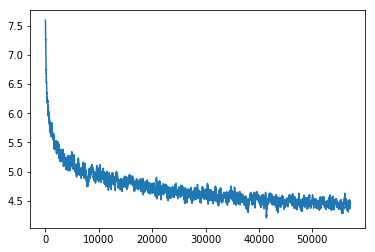

In [42]:
# plot smoothed losses to reduce variability
def smoothed_loss(x, decay=0.99):
    y = np.zeros(len(x))
    last = 0
    for t in range(len(x)):
        z = decay * last + (1 - decay) * x[t]
        y[t] = z / (1 - decay ** (t + 1))
        last = z
    return y

import matplotlib.pyplot as plt

plt.plot(smoothed_loss(losses))
plt.show()

### 3.2.3 Neural Network Models

We know that LogisticRegression is a 1-layer FNN. It can be generalized to FNN of 2 or more layers to get more complex models to the problem described in 3.2.1.

If we use a LogisticRegression model with vocabulary size 10000, the number of parameters is about $10^8$.

If we use a 2-layers FNN with the hidden layer of size 100, the number of parameters is about $2\times 10^6$ (much better). Using FNN is a kind of compression.

# 4. LearningWord Embeddings - Word2Vec

Using Language Modeling is one way to learn Word Embeddings. (see 3.)

We modelize the sentence using one-hot-vector.

<img src="F2.png"></img>

Instead of using the whole sentence, we can use only some previous words:

<img src="F3.png"></img>

( **skip-grams**)

etc.

We can learn them by Text classification, Word Analogies, Similarity... In this section, we will learn word embeddings by language modelling. In fact, we have done it in 3.2.3 with an FNN model. The transformed input at hidden vector can be represented as word embeddings for the vocabulary. Practical application has shown that word embeddings learned by bigram is not good enough. We will see some improvements of bigram and reach its modified version called **Word2Vec**.

## 4.1 CBOW

- CBOW stands for Continuous Bag of Words
- It is a parametric model for classification, can learn word embeddings
- It can be represented as an FNN model
- Different with bigram: it uses some previous and some following words as context

**Model (as FNN)**
Let $C$ denote the set of $m_1$ previous and $m_2$ following words of the targer word
- Input: ($|C| = m_1 + m_2$ context words ($|C|\times |V|$-dimensional vectors))
- Output: a word ($|V|-$dimensional vector)

- Layer 1:
$$
a_1 = \frac1{|C|} \sum_{c\in C} W^{(1)}c
$$

$$
z_1 = a_1
$$
- Layer 2:
$$
a_2 = W^{(2)} z_1 
$$

$$
z_2 = \mathrm {softmax}(a_2)
$$

The model will learn parameters $W^{(1)}, W^{(2)}$. $a_1$ can therefore be viewed as a word embedding of the vocabulary. $W^{(1)}$ contains the images of the one-hot vectors representing words in the lower-dimensional subspace.

## 4.2 Skipgram

- Skipgram is like the opposite of CBOW

 Example: We have a sentence `I would like to drink some tea.`
 
 In CBOW: Input: (`I`, `would`, `to`, `drink`) $\to$ Output: (`like`)
 
 In Skipgram: 
 - Input: `like` -> Output: `I`
 - Input: `like` -> Output: `would`
 - Input: `like` -> Output: `to`
 - Input: `like` -> Output: `drink`
 
- Skipgram is like bigram, but with some skipped-word
  
  In bigram: Input: `like` -> Output: `to` (only)
  In skipgram: Possible: Input: `like` -> Output: `drink` (`to` is skipped)
  
- The model is similar to CBOW or bigram with FNN. Only input and output are different.
 
** The model:**
 - Input: a word ($|V|$-dimensional vector))
 - Output: a word ($|V|-$dimensional vector)
 - Layer 1:
 $$
 a_1 = W^{(1)} x
 $$

 $$
 z_1 = a_1
 $$
 - Layer 2:
 $$
 a_2 = W^{(2)} z_1
 $$

 $$
 z_2 = \mathrm {softmax}(a_2)
 $$

 Similarly, the model will learn parameters $W^{(1)}, W^{(2)}$ and predict $z_2$ as $\mathbf P(y|x)$. Again, $W^{(1)}$ can be  viewed as a word embedding for the vocabulary.

## 4.3 Reduce Complexity of the Prediction Task

If we use softmax as the output activation, the complexity is $O(|V|)$ where $V$ denotes the vocabulary. $|V|$ can be extremely large (3 million for word2vec).

We consider 2 solutions to reduce the complexity: Hierarchical softmax and 

### 4.3.1 Hierarchical Softmax

It is in fact the hierarchical strategy for multiclass classification. (See DSC101, lesson 8)

The idea of hierarchical softmax is to organize words into a binary tree where leaves represent words.

<img src="F4.png"></img>

An example of the tree is the Huffman coding (https://en.wikipedia.org/wiki/Huffman_coding). Words with high frequenct ("a", "the", "in", ...) are on top. Rare words are found in the bottom.

Then do a first classification for the first level. The problem becomes predicting

$\mathbf P(\textrm{"left branch"}| x)$, $\mathbf P(\textrm{"right branch"}| x)$

and it can be done by
$$
\sigma(f(x))
$$

where $f(x)$ is the output of $x$ via an FNN model before performing the sigmoid ($\sigma$) at the output.

Hence, we reduce the multiclass classification problem to $O(\log |V|)$ binary classification problems. The output of each of these problems is just a probability. Hence the general output size reduces to $O(\log |V|)$. This reduces the complexity in prediction.




### 4.3.2 Negative Sampling

Examples that we face in the corpus or in reality are considered as **positive** example.
```
like -> would
like -> drink
```
are positive examples.

We can think of building negative examples.
```
like -> like
like -> brown
```

Then transform the problem to binary classification.

** The model:**
 - Input: a context word and a target word ($(C+1)\times|V|$-dimensional vector))
 - Output: a number between 0, 1
 - Loss function: Binary crossentropy
 $$
 J = \sum_{c\in C}\log\sigma(f(c)) + \sum_{n\in Neg} \log(1-\sigma f(n))
 $$
 ($Neg$: negative target word, $C$: positive target word)
 - Layer 1:
 $$
 a_1 = W^{(1)} x
 $$

 $$
 z_1 = a_1
 $$
 - Layer 2:
 $$
 a_2 = W^{(2)} z_1
 $$

 $$
 z_2 = \mathrm {softmax}(a_2)
 $$

This strategy will increase the training set's size but the problem becomes binary classification.

In fact in application of language modelling (like speech to text), by some way we can reduce the number of potential missing words, say $K$. Doing binary classification on these words is fine to get the best word for prediction.

**Important remarks for negative sampling**
- How many negative samplings should we choose for a context word?
  It depends on the dataset. Practical experiences show that 5 to 10 are most common choice.
  
- How do we choose negative samples?
  - Use the probability of a single word occurring (for example, frequency of a word $count(w)/|V|$, or the smoothly modified one). 
  - Sampling by this probability
  
- Another strategy for doing negative sampling:

Remind the positive examples:
```
like -> would
like -> drink
```

Instead of sampling
```
like -> like
like -> brown
```
we do an inverse job
```
brown -> would
fox -> would
```

This appears to work also well.

## 4.4 Summary about Word2vec

Word2vec is a modification on the bigram neural network, where we use **skip gram** and **negative sampling** to transform a multiclass classification to a binary classification problem.

## 4.5 Word Embeddings with Word2vec

We see the parameters in the model

- $W^{(1)}$ is a $V \times D$ vector ($D$ is the number of hidden units)
- $W^{(2)}$ is a $D \times D$ vector

In theory, the embedding matrix is $W^{(1)}$. In practice, we can choose one of the following matrix and the word embeddings matrix

- $W^{(1)}$
- $\left[ W^{(1)}, (W^{(2)})^t \right]$ (concatenation)
- $(W^{(1)}+(W^{(2)})^t)/2$ (or another linear combination between them)
- Normalized version of the above vectors

## 4.6 Implementation

From scratch: https://github.com/lazyprogrammer/machine_learning_examples/blob/master/nlp_class2/word2vec.py

With Tensorflow: https://github.com/lazyprogrammer/machine_learning_examples/blob/master/nlp_class2/word2vec_tf.py

# 5 - Word Embeddings [3] - GloVe

## 5.1 Recommender System

The objective of a recommender system is to make a score for any pair client-product, that predicts the client's opinion to product. 

For examble
<table>
    <tr>
        <th>
        </th>
        <th>
            Movie 1
        </th>
        <th>
            Movie 2
        </th>
        <th>
            Movie 3
        </th>
    </tr>
    <tr>
        <td>
            User 1
        </td>
        <td>
            4
        </td>
        <td>
            5
        </td>
        <td>
            5
        </td>
    </tr>
    <tr>
        <td>
            User 2
        </td>
        <td>
            3
        </td>
        <td>
            4
        </td>
        <td>
            2
        </td>
    </tr>
    <tr>
        <td>
            ...
        </td>
        <td>
            ...
        </td>        
        <td>
            ...
        </td>        
        <td>
            ...
        </td>  
    </tr>
</table>

Suppose there are $N$ users and $M$ movies, the scores can be represented in the form of an $N \times M$ matrix. If the users manually rate their products, we have a training set as such a matrix. But the matrix is sparse, there are lots of missing values because one user does not use all products.

The recommender system can fill the missing values as result of some prediction algorithm. If a high score of user $s$ and product $p$ is found, $p$ will be recommended to $s$.

Such a prediction algorithm's example is **collaborative filtering**, namely, we use other users'data to help make predictions for the interested user. The intuition is any users with the same interest can be put into one group whose action is potentially alike.

<img src="F5.png"></img>



## 5.2 Application of Recommender System in NLP

In NLP, we can consider a word as a user and a document as a product. For example, it may be reasonable to get some data like this

<table>
    <tr>
        <th>
            Count of
        </th>
        <th>
            Doc 1
        </th>
        <th>
            Doc 2
        </th>
        <th>
            Doc 3
        </th>
        <th>
            Doc 4
        </th>
    </tr>
    <tr>
        <td>
            `quantum`
        </td>
        <td>
            100
        </td>
        <td>
            30
        </td>
        <td>
            58
        </td>
        <td>
            0
        </td>
    </tr>
    <tr>
        <td>
            `gravity`
        </td>
        <td>
            99
        </td>
        <td>
            50
        </td>
        <td>
            74
        </td>
        <td>
            3
        </td>
    </tr>
    <tr>
        <td>
            `mitochodria`
        </td>
        <td>
            0
        </td>        
        <td>
            1
        </td>        
        <td>
            0
        </td>
        <td>
            500
        </td>
    </tr>
    <tr>
        <td>
            `cell membrane`
        </td>
        <td>
            0
        </td>        
        <td>
            0
        </td>        
        <td>
            2
        </td>
        <td>
            130
        </td>
    </tr>
</table>

We can consider 2 words ae similar if their counts in the documents are similar.

In machine learning, 2 features are called redundant if they are correlated with each other. In reality, documents are redundants. To expolot redundancy, we use dimensionality reduction like SVD or PCA.

**SVD**

$$
R_{(|V|\times D)} = U_{(|V|\times K)} S_{(K\times K)} V_{(K\times D)}^T
$$

where $|V|$ size of the vocabulary, $D$ number of documents, $K$ some small number.

SVD does not work well for recommender system. PCA doesn't, either.

Another strategy is matrix factorization

## 5.3 Matrix Factorization

### 5.3.1 Idea

Let $R$ denote the word-document matrix as shown in section 5.2. We want to write
$$
R \approx \hat R = WU^t
$$

So that the score that user $n$ gives to product $m$ is
$$
\hat R_{n,m} = W_n \cdot U_m
$$

To consider if users $n$ likes product $m$, we just calculate $R_{n,m}$.

Example:
- User 1 likes action-adventure, doesn't care about comedy, dislike romance. It is represented by $w = [1,0,1]$.
- Movie 1 have no action-adventure, has comedy and lots of romance. It is represented by $[-1, 1, 1]$
- By dot product we see the similarity is -2 (not recommended)
- We can see that $[1, 0, -1]$ is an embedding for the user while $[-1, 1, 1]$ is an embedding for the movie.

### 5.3.2 The Optimization Problem

To factorize a matrix, we can solve the problem

$$
\min_{W, U} J = \sum_{(n, m)\in\Omega} (R_{n,m} - \hat R_{n, m})^2 = \sum_{(n, m)\in\Omega} (R_{n,m} - W_n \cdot U_m)^2
$$

where $\Omega$ is the set of all pairs $(n, m)$ where user $n$ rates product $m$. In the NLP problem that we translated in section 5.2, $\Omega$ is just $V \times\mathcal D$ (Cartesian product between the vocabulary and the set of documents).

We will also note $\Omega_m$ the set of users $n$ who rated product $m$ and $\Psi_n$ the set of product $m$ which user $n$ rated.

### 5.3.3 Solution

By derivation, we arrive to
$$
W_n = \left( \sum_{m \in \Psi_n} U_m U_m^t\right)^{-1} \sum_{m \in \Psi_n} R_{n,m} U_m
$$

and
$$
U_m = \left( \sum_{n \in \Omega_m} W_n W_n^t \right)^{-1} \sum_{n \in \Omega_m} R_{n,m} W_n
$$

We see that the solution for $W$ depends on $U$ and for $U$ depends on $W$. So, closed from solution cannot be attained, iterative methods are used in stead.

### 5.3.4 Improve the Model

Depending on the user, or the movie, there may be bias terms. Example, for user 1, 2.5 means average but for user 2, 2.5 means very bad.

So, we would like to add some bias terms to the matrix factorization model.

$$
\hat R_{nm} =W_n \cdot U_m + b_n + c_m + \mu 
$$

where $b_n$ is the user bias, $c_m$ the movie bias and $\mu$ the global average.

We arrive to the optimization problem

$$
\min_{W, U, b, c, \mu} J = \sum_{(n, m)\in\Omega} (R_{n,m} - \hat R_{n, m})^2 = \sum_{(n, m)\in\Omega} (R_{n,m} - W_n \cdot U_m - b_n - c_m - \mu)^2
$$

The solution becomes
$$
W_n = \left( \sum_{m \in \Psi_n} U_m U_m^t\right)^{-1} \sum_{m \in \Psi_n} (R_{n,m} - b_n - c_m - \mu) U_m
$$

$$
U_m = \left( \sum_{n \in \Omega_m} W_n W_n^t \right)^{-1} \sum_{n \in \Omega_m} (R_{n,m} -b_n - c_m - \mu) W_n
$$

$$
b_n = \frac1{|\Psi_n|}\sum_{m \in \Psi_n} (R_{n,m} - W_n\cdot U_m - c_m - \mu)
$$

$$
c_m = \frac1{|\Omega_m|}\sum_{n \in \Omega_m} (R_{n,m} - W_n\cdot U_m - b_n - \mu)
$$

$$
\mu = \frac1{|\Omega|} R_{ij}
$$
(no need to update \mu)

### 5.3.5 Regularization

Like other ML model, Matrix Factorization can suffer overfitting problem and regularization is one approach to reduce it.

We modify the loss function, for example by adding a $L_2$-term penalty

$$
\min_{W, U, b, c, \mu}  J= \sum_{(n, m)\in\Omega} (R_{n,m} - W_n \cdot U_m - b_n - c_m - \mu)^2 + \lambda(\Vert W\Vert_F^2 + \Vert U\Vert_F^2 + \Vert b\Vert_2^2 + \Vert c\Vert_2^2)
$$

The solution is now:

$$
W_n = \left( \sum_{m \in \Psi_n} U_m U_m^t + \lambda I \right)^{-1} \sum_{m \in \Psi_n} (R_{n,m} - b_n - c_m - \mu) U_m
$$

$$
U_m = \left( \sum_{n \in \Omega_m} W_n W_n^t + \lambda I \right)^{-1} \sum_{n \in \Omega_m} (R_{n,m} -b_n - c_m - \mu) W_n
$$

$$
b_n = \frac1{|\Psi_n|+\lambda}\sum_{m \in \Psi_n} (R_{n,m} - W_n\cdot U_m - c_m - \mu)
$$

$$
c_m = \frac1{|\Omega_m|+\lambda}\sum_{n \in \Omega_m} (R_{n,m} - W_n\cdot U_m - b_n - \mu)
$$

$$
\mu = \frac1{|\Omega|} R_{ij}
$$

## 5.4 Summary about GloVe

- GloVe stands for Global vectors for word representation. It uses the matrix factorization (recommender system) to learn word embeddings (instead of language modelling like word2vec)
- Except some preprocessing, it is exactly like matrix factorization.

## 5.5 Implementation

From scratch: https://github.com/lazyprogrammer/machine_learning_examples/blob/master/nlp_class2/glove.py

With Tensorflow: https://github.com/lazyprogrammer/machine_learning_examples/blob/master/nlp_class2/glove_tf.py

## References

(3) Bengio et al., 2003, *A neural probabilistic language model.*

(4) Mikolov et al., 2015, *Efficient estimation of word representatin in vector space.*

(5) w2v pretrained model: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

(6) Glove pretrained model: http://nlp.stanford.edu/data/glove.6B.zip

(7) https://www.nltk.org/book/ch02.html

(8) https://github.com/lazyprogrammer/machine_learning_examples/blob/master/nlp_class2/

(9) The Brown corpus